<h1>Trade Promo Optimization: Impact of Promotion on Promotion Groups</h1>

#### Objective
For a manufacturer we have to analyze how different promotions affect the Volume Sales for the given Promotion Groups.
We will start with understanding the given data, health of the dataset, perform some EDA which will help us establish some hypothsis.

In [235]:
# Import necessary librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ta_lib.core.api import display_as_tabs
from ta_lib.eda import analysis

pd.set_option('Display.max_rows',20)
pd.set_option('Display.max_columns',None)
%matplotlib inline

<h3>Data Discovery</h3>

In [236]:
# Reading data

scan_df = pd.read_csv("../Data/Masked_Scan_Data.csv")
promo_df = pd.read_csv("../Data/Masked_Promo_Data.csv")

In [237]:
from ta_lib.reports.api import summary_report

summary_report(scan_df, '../EDA/scan_df.html')
summary_report(promo_df, '../EDA/promo_df.html')

In [238]:
# Check scan data

scan_df.head()

,Retailer,Description,Category,Sub.Category,Segment,Sub.Segment,Manufacturer,Brand,Sub.Brand,Packsize,Product.Type,Promo.Group,APN,Date,Unit.Sales,Val.Sales,Vol.Sales,Wtd.Selling.Dist,ppg_to_model
0,Retailer 0,Description 0,Confectionery,Candy Confectionery,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,2018-10-07,0.0,0.0,0.0,0.0,0
1,Retailer 0,Description 0,Confectionery,Candy Confectionery,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,2018-10-14,0.0,0.0,0.0,0.0,0
2,Retailer 0,Description 0,Confectionery,Candy Confectionery,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,2018-10-21,0.0,0.0,0.0,0.0,0
3,Retailer 0,Description 0,Confectionery,Candy Confectionery,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,2018-10-28,0.0,0.0,0.0,0.0,0
4,Retailer 0,Description 0,Confectionery,Candy Confectionery,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,2018-11-04,0.0,0.0,0.0,0.0,0


In [239]:
print('Available Sales Data:',scan_df['Date'].min(),scan_df['Date'].max())

Available Sales Data: 2018-08-05 00:00:00 2020-09-27 00:00:00


In [240]:
print('Available Promo Data:',promo_df['Date'].min(),promo_df['Date'].max())

Available Promo Data: 2017-12-31 00:00:00 2021-01-03 00:00:00


In [241]:
scan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137400 entries, 0 to 137399
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Retailer          137400 non-null  object        
 1   Description       137400 non-null  object        
 2   Category          137400 non-null  object        
 3   Sub.Category      137400 non-null  object        
 4   Segment           137400 non-null  object        
 5   Sub.Segment       126672 non-null  object        
 6   Manufacturer      137400 non-null  object        
 7   Brand             137400 non-null  object        
 8   Sub.Brand         137400 non-null  object        
 9   Packsize          137400 non-null  object        
 10  Product.Type      137400 non-null  object        
 11  Promo.Group       137400 non-null  object        
 12  APN               137400 non-null  object        
 13  Date              137400 non-null  datetime64[ns]
 14  Unit

In [242]:
display_as_tabs([('Sales Data',scan_df.shape),('Promo Data',promo_df.shape)])

Tabs
    [0] Str(tuple, name='Sales Data')
    [1] Str(tuple, name='Promo Data')

#### Variable Summary

In [243]:
sum1=analysis.get_variable_summary(scan_df)
sum2=analysis.get_variable_summary(promo_df)
display_as_tabs([('Sales Data',sum1),('Promo Data',sum2)])

Tabs
    [0] DataFrame(height=300, name='Sales Data', sizing_mode='fixed', value=                     Varia..., width=800)
    [1] DataFrame(height=300, name='Promo Data', sizing_mode='fixed', value=                     Varia..., width=800)

Observations: We have data for 2 retailers with 30 Promo Groups, however the ppgs to model are 6. This can be observed in the Promo Data tab.

<h4>Dataset Health Analysis</h4>

In [244]:
sum1, plot1=analysis.get_data_health_summary(scan_df,return_plot=True)
sum2, plot2=analysis.get_data_health_summary(promo_df,return_plot=True)
display_as_tabs([('Sales Data',plot1),('Promo Data',plot2)])

Tabs
    [0] HoloViews(Layout, name='Sales Data')
    [1] HoloViews(Layout, name='Promo Data')

In [245]:
sum1, plot1=analysis.get_missing_values_summary(scan_df,return_plot=True)
sum2, plot2=analysis.get_missing_values_summary(promo_df,return_plot=True)
display_as_tabs([('Sales Data',plot1),('Promo Data',plot2)])

Tabs
    [0] HoloViews(Bars, name='Sales Data')
    [1] HoloViews(Bars, name='Promo Data')

In [246]:
scan_df[scan_df['Unit.Sales']!=0].shape

(21393, 19)

In [247]:
scan_df[(scan_df['ppg_to_model']==1)]['Brand'].unique()

array(['Brand 4', 'Brand 5', 'Brand 1'], dtype=object)

In [248]:
numerical_cols = [i for i in scan_df.columns if scan_df[i].dtype != 'O']
categorical_cols = [i for i in scan_df.columns if scan_df[i].dtype == 'O']

In [249]:
# Checking unique value counts of each categorical column
for i in categorical_cols:
    if scan_df[i].nunique()<100:
        print(scan_df[i].value_counts())

Retailer 0    68700
Retailer 1    68700
Name: Retailer, dtype: int64
Confectionery    137400
Name: Category, dtype: int64
Candy Confectionery    137400
Name: Sub.Category, dtype: int64
Candy Bags    98790
Pre-Teens     18740
Refresh       11978
Xmas           3616
Gifting        1356
Easter         1130
Sharepacks      904
Bars            660
Halloween       226
Name: Segment, dtype: int64
Candy Bags - Jelly          62816
Pre-Teens - Sugar           17264
Candy Bags - Chews           7696
Refresh - Medicated          5616
Candy Bags - Marshmallow     4784
Candy Bags - Other           4368
Refresh - Pocket Candy       4160
Candy Bags - Mints           4160
Candy Bags - Tnc             3328
Xmas - Candy                 3328
Candy Bags - Licorice        2704
Gifting - Reg                1248
Refresh - Mints              1248
Candy Bags - Hard Candy      1248
Easter - Candy               1040
Sharepacks - Candy            832
Bars - Bitesize               416
Halloween - Other            

In [250]:
scan_df.isnull().sum()

Retailer                0
Description             0
Category                0
Sub.Category            0
Segment                 0
Sub.Segment         10728
Manufacturer            0
Brand                   0
Sub.Brand               0
Packsize                0
Product.Type            0
Promo.Group             0
APN                     0
Date                    0
Unit.Sales              0
Val.Sales               0
Vol.Sales               0
Wtd.Selling.Dist        0
ppg_to_model            0
dtype: int64

In [251]:
print('% 0f Missing value in Sub.Segment field is',round(scan_df['Sub.Segment'].isnull().sum()/scan_df.shape[0]*100,2),'%')

% 0f Missing value in Sub.Segment field is 7.81 %


Sub.Segment field has some missing value however we are not considering it since our objective is to build model from Retailer x Promo.Group level.

<h3>Data Preprocessing</h3>

In this section we will generate a model ready and EDA ready dataset for our objective.

In [252]:
scan_df.columns

Index(['Retailer', 'Description', 'Category', 'Sub.Category', 'Segment',
       'Sub.Segment', 'Manufacturer', 'Brand', 'Sub.Brand', 'Packsize',
       'Product.Type', 'Promo.Group', 'APN', 'Date', 'Unit.Sales', 'Val.Sales',
       'Vol.Sales', 'Wtd.Selling.Dist', 'ppg_to_model'],
      dtype='object')

In [253]:
# lets remove columns not required for analysis. i.e. 'Category', 'Sub.Category'
scan_df_1 = scan_df[[ 'Date','Retailer', 'Description', 'Segment',
       'Sub.Segment', 'Manufacturer', 'Brand', 'Sub.Brand', 'Packsize',
       'Product.Type', 'Promo.Group', 'APN', 'Unit.Sales', 'Val.Sales',
       'Vol.Sales', 'Wtd.Selling.Dist', 'ppg_to_model']]

In [254]:
scan_df_1.head()

,Date,Retailer,Description,Segment,Sub.Segment,Manufacturer,Brand,Sub.Brand,Packsize,Product.Type,Promo.Group,APN,Unit.Sales,Val.Sales,Vol.Sales,Wtd.Selling.Dist,ppg_to_model
0,2018-10-07,Retailer 0,Description 0,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,0.0,0.0,0.0,0.0,0
1,2018-10-14,Retailer 0,Description 0,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,0.0,0.0,0.0,0.0,0
2,2018-10-21,Retailer 0,Description 0,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,0.0,0.0,0.0,0.0,0
3,2018-10-28,Retailer 0,Description 0,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,0.0,0.0,0.0,0.0,0
4,2018-11-04,Retailer 0,Description 0,Bars,Bars - Bitesize,Manufacturer 0,Brand 0,Sub.Brand 0,38.6g,Product.Type 0,Promo.Group 0,APN 0,0.0,0.0,0.0,0.0,0


In [255]:
# Rename Promo.Group as PPG
scan_df_1 = scan_df_1.rename(columns={'Promo.Group':'PPG'})

In [256]:
scan_df_1.columns

Index(['Date', 'Retailer', 'Description', 'Segment', 'Sub.Segment',
       'Manufacturer', 'Brand', 'Sub.Brand', 'Packsize', 'Product.Type', 'PPG',
       'APN', 'Unit.Sales', 'Val.Sales', 'Vol.Sales', 'Wtd.Selling.Dist',
       'ppg_to_model'],
      dtype='object')

In [257]:
ppg_inscope = scan_df_1[scan_df_1['ppg_to_model']==1]['PPG'].unique()
print('Inscope PPG:',scan_df_1[scan_df_1['ppg_to_model']==1]['PPG'].nunique())

Inscope PPG: 6


In [258]:
print('Out of scope PPG:',scan_df_1[scan_df_1['ppg_to_model']==0]['PPG'].nunique())

Out of scope PPG: 24


There are 6 promo groups that we have to model i.e. in-scope PPGs.
There are 24 Out of scope PPGs.

In [259]:
promo_df.head()

,Date,PPG,promo_catalogue,promo_ins,display_platinum,display_gold,display_silver,display_bronze,Retailer
0,2018-01-07,Promo.Group 3,1,0,0,0,0,0,Retailer 0
1,2018-01-07,Promo.Group 19,0,1,0,0,0,0,Retailer 0
2,2018-01-07,Promo.Group 22,0,0,0,0,0,0,Retailer 0
3,2018-01-07,Promo.Group 20,1,0,0,0,0,0,Retailer 0
4,2018-01-07,Promo.Group 6,1,0,1,0,0,0,Retailer 0


In [260]:
promo_df['PPG'].unique()

array(['Promo.Group 3', 'Promo.Group 19', 'Promo.Group 22',
       'Promo.Group 20', 'Promo.Group 6', 'Promo.Group 5'], dtype=object)

In [261]:
promo_df['Retailer'].unique()

array(['Retailer 0', 'Retailer 1'], dtype=object)

In [262]:
scan_df_1.shape

(137400, 17)

### Filtering Inscope data

In [263]:
ppg_inscope_df = scan_df_1[scan_df_1['PPG'].isin(ppg_inscope)] # Creating Inscope Dataframe

In [264]:
ppg_inscope_df.shape

(24408, 17)

In [265]:
ppg_outscope_df = scan_df_1[~scan_df_1['PPG'].isin(ppg_inscope)]

### Merge promo file with inscope ppg file

We have a sales dataset which contains the sales for each Promo Group on a particular date. We want to analyse if there isany impact of Promotion Variables on the Volume Sales. Therefore we will need to check if promotions were applied on the given dates. We will therefore merge this sales data with the prmo data on Date, Retailer and Promo.Group

In [266]:
ppg_inscope_df['Date'] = pd.to_datetime(ppg_inscope_df['Date'])
promo_df['Date'] = pd.to_datetime(promo_df['Date'])

In [267]:
pd.set_option("display.max_columns",None)
ppg_inscope_merged = ppg_inscope_df.merge(promo_df, on=['Retailer','PPG','Date'], how = 'left')
ppg_inscope_merged.head()

,Date,Retailer,Description,Segment,Sub.Segment,Manufacturer,Brand,Sub.Brand,Packsize,Product.Type,PPG,APN,Unit.Sales,Val.Sales,Vol.Sales,Wtd.Selling.Dist,ppg_to_model,promo_catalogue,promo_ins,display_platinum,display_gold,display_silver,display_bronze
0,2018-10-07,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0
1,2018-10-14,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0
2,2018-10-21,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
3,2018-10-28,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0
4,2018-11-04,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0


In [268]:
ppg_inscope_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24408 entries, 0 to 24407
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              24408 non-null  datetime64[ns]
 1   Retailer          24408 non-null  object        
 2   Description       24408 non-null  object        
 3   Segment           24408 non-null  object        
 4   Sub.Segment       22464 non-null  object        
 5   Manufacturer      24408 non-null  object        
 6   Brand             24408 non-null  object        
 7   Sub.Brand         24408 non-null  object        
 8   Packsize          24408 non-null  object        
 9   Product.Type      24408 non-null  object        
 10  PPG               24408 non-null  object        
 11  APN               24408 non-null  object        
 12  Unit.Sales        24408 non-null  float64       
 13  Val.Sales         24408 non-null  float64       
 14  Vol.Sales         2440

In [269]:
# Convert Date column to data type Datetime
ppg_inscope_merged['Date']=pd.to_datetime(ppg_inscope_merged['Date'])

In [270]:
numerical_cols = [i for i in ppg_inscope_merged.columns if ppg_inscope_merged[i].dtype != 'O']
categorical_cols = [i for i in ppg_inscope_merged.columns if ppg_inscope_merged[i].dtype == 'O']

In [271]:
print("Numerical Columns:",numerical_cols)
print("Categorical Column:",categorical_cols)

Numerical Columns: ['Date', 'Unit.Sales', 'Val.Sales', 'Vol.Sales', 'Wtd.Selling.Dist', 'ppg_to_model', 'promo_catalogue', 'promo_ins', 'display_platinum', 'display_gold', 'display_silver', 'display_bronze']
Categorical Column: ['Retailer', 'Description', 'Segment', 'Sub.Segment', 'Manufacturer', 'Brand', 'Sub.Brand', 'Packsize', 'Product.Type', 'PPG', 'APN']


In [272]:
print("No of weekly level data available in the dataset:",ppg_inscope_merged['Date'].nunique())

No of weekly level data available in the dataset: 113


In [273]:
ppg_inscope_merged = ppg_inscope_merged.drop(columns=['ppg_to_model']) # Since we have filtered our inscope PPG's so removing PPG_to_model from analysis.

In [274]:
ppg_inscope_merged.isnull().sum()

Date                   0
Retailer               0
Description            0
Segment                0
Sub.Segment         1944
                    ... 
promo_ins              0
display_platinum       0
display_gold           0
display_silver         0
display_bronze         0
Length: 22, dtype: int64

Subsegment has 1944 null values.

In [275]:
ppg_inscope_merged.head()

,Date,Retailer,Description,Segment,Sub.Segment,Manufacturer,Brand,Sub.Brand,Packsize,Product.Type,PPG,APN,Unit.Sales,Val.Sales,Vol.Sales,Wtd.Selling.Dist,promo_catalogue,promo_ins,display_platinum,display_gold,display_silver,display_bronze
0,2018-10-07,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,2018-10-14,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,0,1,0,0,0,0
2,2018-10-21,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,2018-10-28,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4,2018-11-04,Retailer 0,Description 4,Candy Bags,Candy Bags - Chews,Manufacturer 1,Brand 4,Sub.Brand 4,200g,Product.Type 1,Promo.Group 3,APN 4,0.0,0.0,0.0,0.0,0,1,0,0,0,0


<h5>Data Aggregation</h5>

Our objective is to analyse how the promo variables impact the Volume Sales on the Retailer * PPG level. Therefore we will aggregate the dataset on Retailer, Prom Group and Date. The resultant dataframe will be a subset with only required columns.

In [276]:
ppg_inscope_merged['Price'] = ppg_inscope_merged['Val.Sales']/ppg_inscope_merged['Unit.Sales']
ppg_inscope_merged['Price'] = np.where(ppg_inscope_merged['Price'].isin([np.inf, -np.inf]), 0, ppg_inscope_merged['Price'])
ppg_inscope_merged['Price'] = ppg_inscope_merged['Price'].fillna(0)
ppg_inscope_merged['Price'] = ppg_inscope_merged['Price'].round().astype(int)

# Let's check reason for negative price.
ppg_inscope_merged[ppg_inscope_merged['Price']<0]

# Replace negative values with positives
ppg_inscope_merged['Price'] = np.where(ppg_inscope_merged['Price'].isin([-5]), 5, ppg_inscope_merged['Price'])
ppg_inscope_merged['Price'] = np.where(ppg_inscope_merged['Price'].isin([-7]), 7, ppg_inscope_merged['Price'])
ppg_inscope_merged['Weighted_Price'] = ppg_inscope_merged['Price'] / ppg_inscope_merged.groupby(['Date','Retailer','PPG'])['Price'].transform('sum')

In [277]:
ppg_inscope_merged[(ppg_inscope_merged['Weighted_Price'] == 1) & (ppg_inscope_merged['Date'] == '2018-10-07')]

,Date,Retailer,Description,Segment,Sub.Segment,Manufacturer,Brand,Sub.Brand,Packsize,Product.Type,PPG,APN,Unit.Sales,Val.Sales,Vol.Sales,Wtd.Selling.Dist,promo_catalogue,promo_ins,display_platinum,display_gold,display_silver,display_bronze,Price,Weighted_Price
3744,2018-10-07,Retailer 0,Description 172,Candy Bags,Candy Bags - Jelly,Manufacturer 1,Brand 1,Sub.Brand 1,520g,Product.Type 1,Promo.Group 22,APN 171,6597.0,32839.410,3.43044,98.7,0,1,0,0,0,0,5,1.0
9568,2018-10-07,Retailer 0,Description 377,Candy Bags,Candy Bags - Marshmallow,Manufacturer 1,Brand 4,Sub.Brand 6,520g,Product.Type 1,Promo.Group 19,APN 376,9289.0,46337.574,4.83028,97.9,0,1,0,0,0,0,5,1.0
14544,2018-10-07,Retailer 1,Description 172,Candy Bags,Candy Bags - Jelly,Manufacturer 1,Brand 1,Sub.Brand 1,520g,Product.Type 1,Promo.Group 22,APN 171,5267.0,26197.677,2.73884,99.1,0,0,0,0,0,0,5,1.0
18184,2018-10-07,Retailer 1,Description 377,Candy Bags,Candy Bags - Marshmallow,Manufacturer 1,Brand 4,Sub.Brand 6,520g,Product.Type 1,Promo.Group 19,APN 376,7803.0,38633.540,4.05756,99.4,0,0,0,0,0,0,5,1.0


In [278]:
# Ignoring columns with zero Price
ppg_inscope_merged_df = ppg_inscope_merged[ppg_inscope_merged['Price']!=0]
# Create final dataframe
retailer_ppg_groupby = ppg_inscope_merged_df.groupby(['Date', 'Retailer','Brand' ,'PPG'], as_index=False).agg({'Wtd.Selling.Dist':'mean',
                                                                                                             'Vol.Sales':'sum',
                                                                                                             'promo_catalogue':'mean',
                                                                                                             'promo_ins':'mean',
                                                                                                             'display_platinum':'mean',
                                                                                                             'display_gold':'mean',
                                                                                                             'display_silver':'mean',
                                                                                                             'display_bronze':'mean',
                                                                                                             'Weighted_Price':'mean'
                                                                                                            })

In [279]:
retailer_ppg_groupby.head()

,Date,Retailer,Brand,PPG,Wtd.Selling.Dist,Vol.Sales,promo_catalogue,promo_ins,display_platinum,display_gold,display_silver,display_bronze,Weighted_Price
0,2018-08-05,Retailer 0,Brand 1,Promo.Group 20,98.433333,3.71096,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1,2018-08-05,Retailer 0,Brand 4,Promo.Group 19,98.300000,8.85976,0.0,1.0,0.0,0.0,0.0,0.0,1.000000
2,2018-08-05,Retailer 0,Brand 4,Promo.Group 3,66.762500,10.65029,0.0,0.0,0.0,0.0,0.0,0.0,0.125000
3,2018-08-05,Retailer 0,Brand 5,Promo.Group 5,75.675000,23.34048,0.0,1.0,0.0,0.0,0.0,0.0,0.250000
4,2018-08-05,Retailer 0,Brand 5,Promo.Group 6,89.618182,55.69276,1.0,0.0,0.0,0.0,1.0,0.0,0.090909


In [280]:
print('Shape:',retailer_ppg_groupby.shape)

Shape: (1337, 13)


In [281]:
sum1=analysis.get_variable_summary(retailer_ppg_groupby)
display_as_tabs([('Merged Data',sum1)])

Tabs
    [0] DataFrame(height=300, name='Merged Data', sizing_mode='fixed', value=                     Varia..., width=800)

In [282]:
sum1, plot1=analysis.get_data_health_summary(retailer_ppg_groupby,return_plot=True)
display_as_tabs([('Final Dataset',plot1)])

Tabs
    [0] HoloViews(Layout, name='Final Dataset')

In [283]:
retailer_ppg_groupby['Unique_key'] = retailer_ppg_groupby['Retailer']+'_'+ retailer_ppg_groupby['PPG']

In [284]:
req_comp = retailer_ppg_groupby['Unique_key'].unique()
req_comp

array(['Retailer 0_Promo.Group 20', 'Retailer 0_Promo.Group 19',
       'Retailer 0_Promo.Group 3', 'Retailer 0_Promo.Group 5',
       'Retailer 0_Promo.Group 6', 'Retailer 1_Promo.Group 20',
       'Retailer 1_Promo.Group 19', 'Retailer 1_Promo.Group 3',
       'Retailer 1_Promo.Group 5', 'Retailer 1_Promo.Group 6',
       'Retailer 0_Promo.Group 22', 'Retailer 1_Promo.Group 22'],
      dtype=object)

<h3>Exploratory Data Analysis</h3>

In [285]:
df_EDA = retailer_ppg_groupby.copy()

In [286]:
df_EDA.head()

,Date,Retailer,Brand,PPG,Wtd.Selling.Dist,Vol.Sales,promo_catalogue,promo_ins,display_platinum,display_gold,display_silver,display_bronze,Weighted_Price,Unique_key
0,2018-08-05,Retailer 0,Brand 1,Promo.Group 20,98.433333,3.71096,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,Retailer 0_Promo.Group 20
1,2018-08-05,Retailer 0,Brand 4,Promo.Group 19,98.300000,8.85976,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,Retailer 0_Promo.Group 19
2,2018-08-05,Retailer 0,Brand 4,Promo.Group 3,66.762500,10.65029,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,Retailer 0_Promo.Group 3
3,2018-08-05,Retailer 0,Brand 5,Promo.Group 5,75.675000,23.34048,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,Retailer 0_Promo.Group 5
4,2018-08-05,Retailer 0,Brand 5,Promo.Group 6,89.618182,55.69276,1.0,0.0,0.0,0.0,1.0,0.0,0.090909,Retailer 0_Promo.Group 6


In [287]:
df_EDA.describe()

,Wtd.Selling.Dist,Vol.Sales,promo_catalogue,promo_ins,display_platinum,display_gold,display_silver,display_bronze,Weighted_Price
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,84.427600,17.515371,0.186238,0.150337,0.062079,0.051608,0.040389,0.112191,0.438751
std,16.274814,21.974680,0.389444,0.357535,0.241390,0.221317,0.196943,0.315720,0.392373
min,0.100000,0.000520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824
25%,74.775000,4.857320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
50%,88.653846,11.397040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
75%,98.400000,20.083480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,99.933333,173.590620,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
df_EDA.describe(include=['object','datetime64'])

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,Date,Retailer,Brand,PPG,Unique_key
count,1337,1337,1337,1337,1337
unique,113,2,3,6,12
top,2019-09-01 00:00:00,Retailer 1,Brand 4,Promo.Group 20,Retailer 0_Promo.Group 20
freq,12,673,452,226,113
first,2018-08-05 00:00:00,NaN,NaN,NaN,NaN
last,2020-09-27 00:00:00,NaN,NaN,NaN,NaN


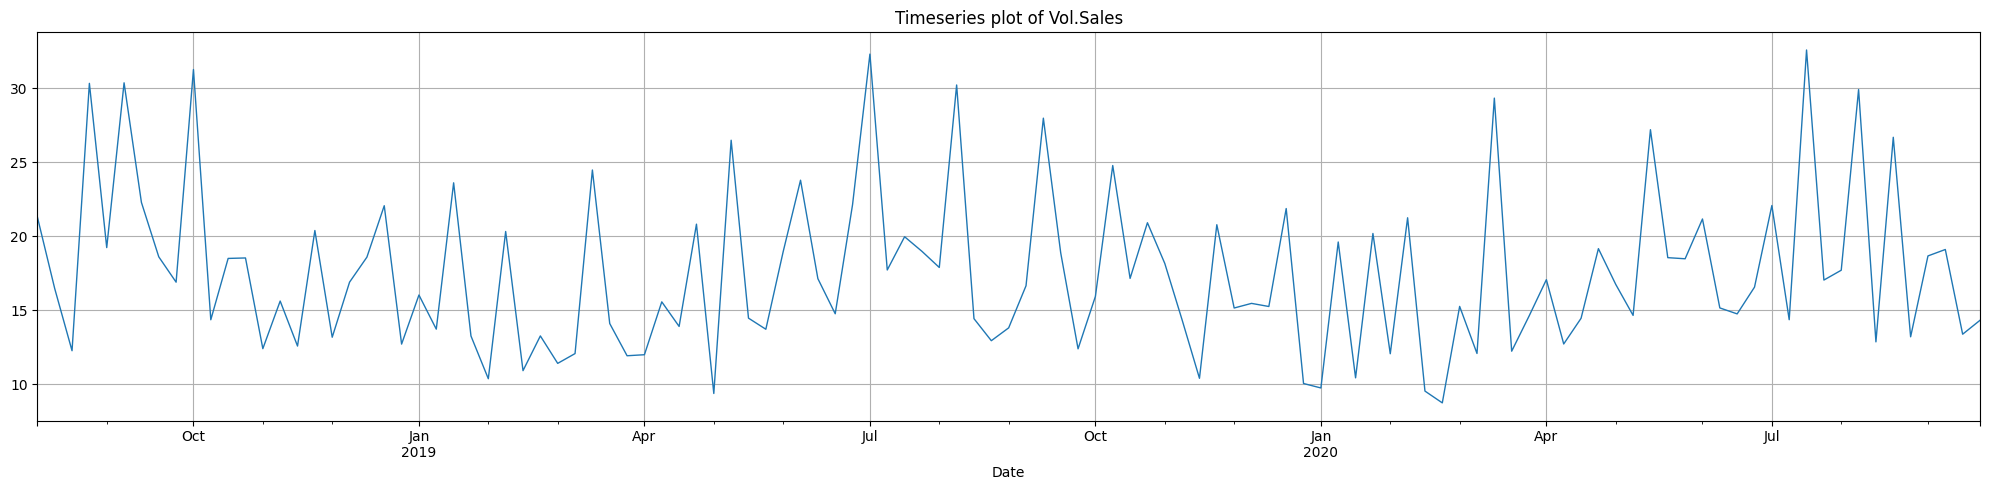

<Figure size 640x480 with 0 Axes>

In [289]:
df_EDA.groupby('Date')['Vol.Sales'].mean().plot(figsize=(20,5),title='Timeseries plot of Vol.Sales',lw=1,grid=True)
plt.show()
plt.savefig('my_plot.png')

In [290]:
df_EDA['Year'] = df_EDA['Date'].dt.year
df_EDA['Month'] = df_EDA['Date'].dt.month
df_EDA['Week'] = df_EDA['Date'].dt.week

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


In [291]:
df_EDA['Date']=pd.to_datetime(df_EDA['Date'])
df_EDA['Quarter'] = df_EDA['Date'].dt.to_period('Q')
df_EDA['Quarter'] = df_EDA['Quarter'].astype(str)

<h4>Time Series Analysis on Volume Sales w.r.t Promo Catalogue<h4\>

In [292]:
pwd

'c:\\Users\\raghul.singh\\Documents\\TPO\\Data'

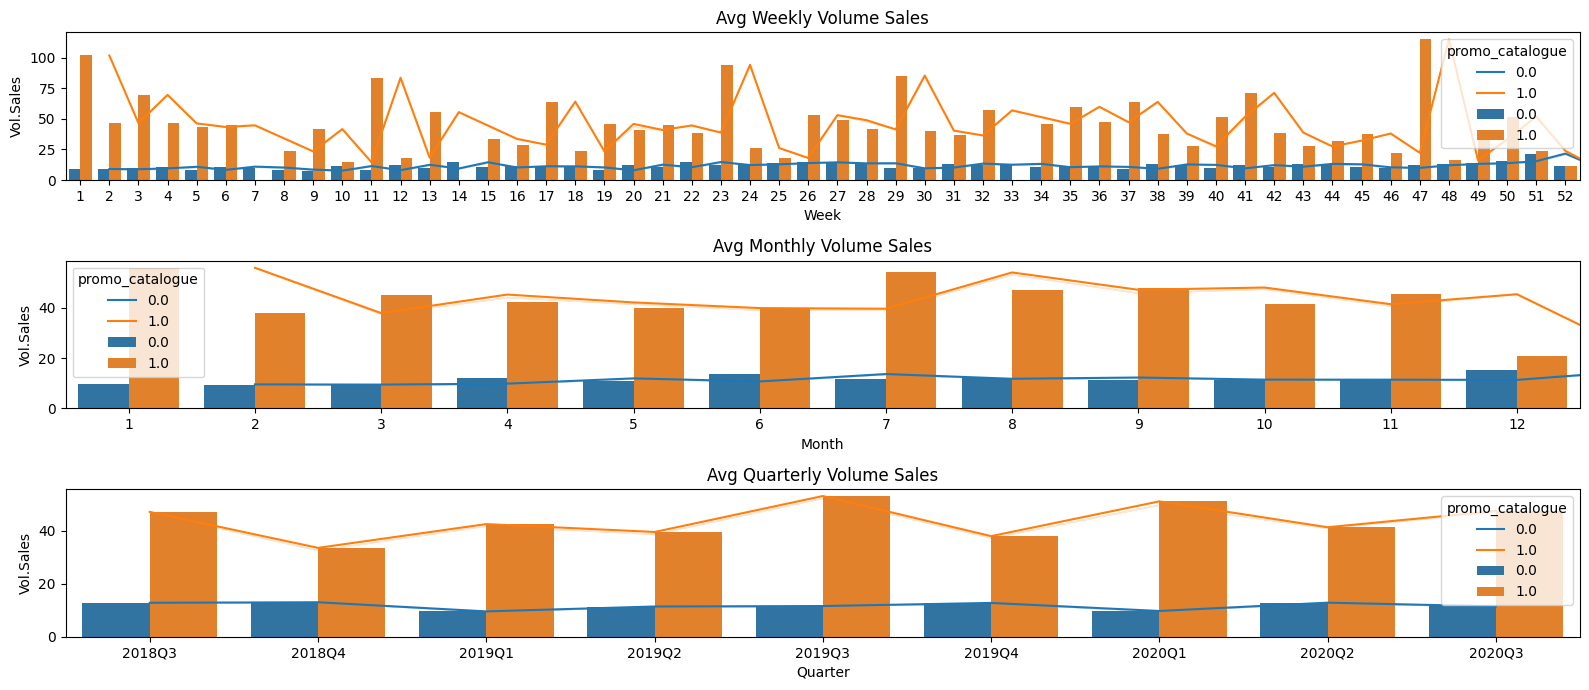

In [293]:
fig, axs = plt.subplots(3, 1, figsize=(16, 7))
sns.lineplot(data=df_EDA,x='Week',y='Vol.Sales',ci=False,hue='promo_catalogue',ax=axs[0])
sns.barplot(data=df_EDA,x='Week',y='Vol.Sales',ci=False,hue='promo_catalogue',ax=axs[0])
axs[0].set_title('Avg Weekly Volume Sales')

sns.lineplot(data=df_EDA,x='Month',y='Vol.Sales',ci=False,hue='promo_catalogue',ax=axs[1])
sns.barplot(data=df_EDA,x='Month',y='Vol.Sales',ci=False,hue='promo_catalogue',ax=axs[1])
axs[1].set_title('Avg Monthly Volume Sales')

sns.lineplot(data=df_EDA,x='Quarter',y='Vol.Sales',ci=False,hue='promo_catalogue',ax=axs[2])
sns.barplot(data=df_EDA,x='Quarter',y='Vol.Sales',ci=False,hue='promo_catalogue',ax=axs[2])
axs[2].set_title('Avg Quarterly Volume Sales')

plt.tight_layout()
plt.savefig('../EDA/Promo_catalogue & Avg Volume Sales.png')
plt.show()

Observation: The plotted data clearly indicates a positive influence of the Promo catalogue on volume sales. Quarterly analysis reveals a noticeable seasonality in volume sales for the Promo catalogue, marked by periodic spikes. Moreover, there appears to be a declining trend in sales towards the year's end.

Actionable Insight: Implementing catalogue promotions towards the year-end seems to have a lesser impact on volume sales.

<h4>Time Series Analysis on Volume Sales w.r.t Promo Ins<h4\>

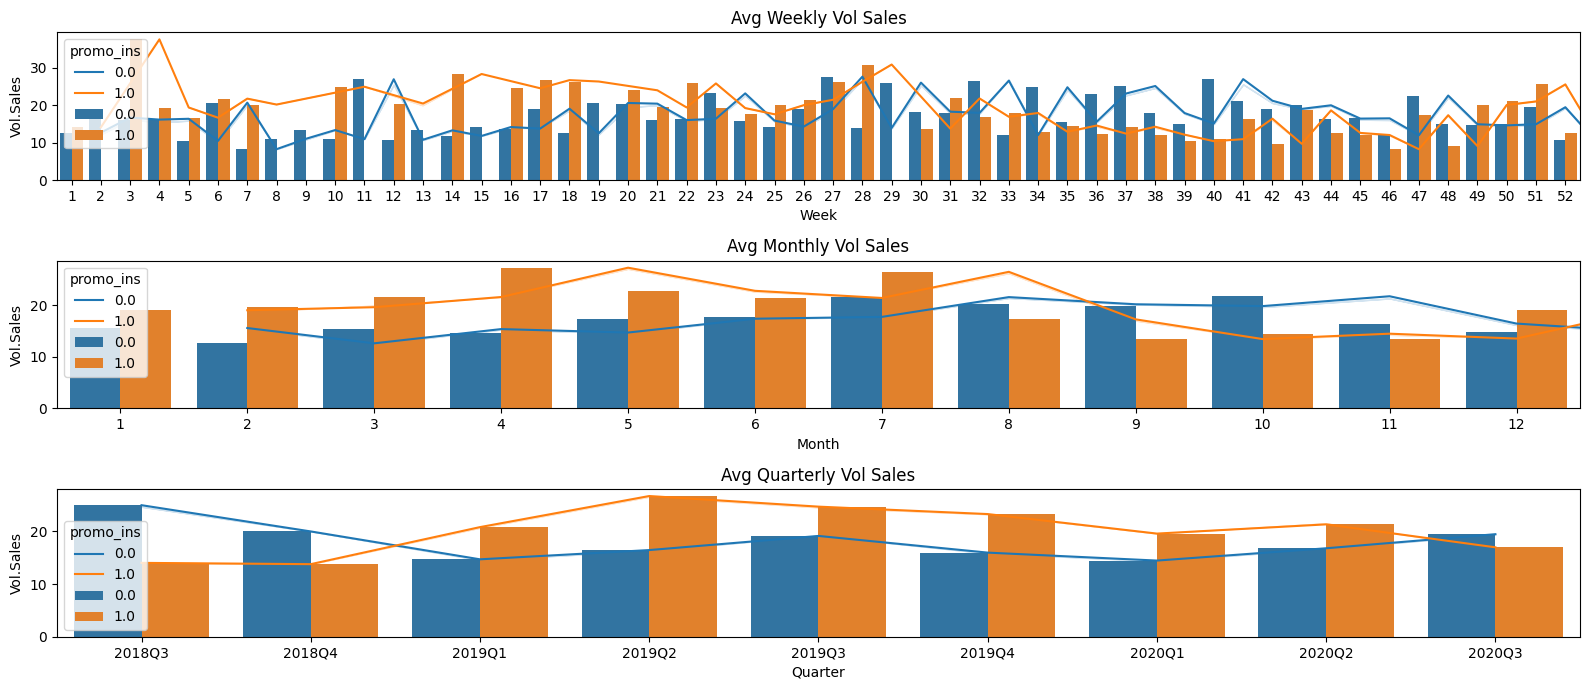

In [294]:
fig, axs = plt.subplots(3, 1, figsize=(16, 7))
sns.lineplot(data=df_EDA,x='Week',y='Vol.Sales',ci=False,hue='promo_ins',ax=axs[0])
sns.barplot(data=df_EDA,x='Week',y='Vol.Sales',ci=False,hue='promo_ins',ax=axs[0])
axs[0].set_title('Avg Weekly Vol Sales')

sns.lineplot(data=df_EDA,x='Month',y='Vol.Sales',ci=False,hue='promo_ins',ax=axs[1])
sns.barplot(data=df_EDA,x='Month',y='Vol.Sales',ci=False,hue='promo_ins',ax=axs[1])
axs[1].set_title('Avg Monthly Vol Sales')

sns.lineplot(data=df_EDA,x='Quarter',y='Vol.Sales',ci=False,hue='promo_ins',ax=axs[2])
sns.barplot(data=df_EDA,x='Quarter',y='Vol.Sales',ci=False,hue='promo_ins',ax=axs[2])
axs[2].set_title('Avg Quarterly Vol Sales')

plt.tight_layout()
plt.savefig('../EDA/promo_ins & Avg Volume Sales.png')
plt.show()

Observation: In contrast to the impact of the Promo Catalogue, Promo Instore appears to positively influence sales during the initial 6 months, gradually diminishing in effect. Notably, sales spike up in the absence of Promo Instore activities during the latter half of the year.

Actionable Insights: Except for the year 2019, it's evident that the impact of instore promotions on volume sales is relatively modest or less pronounced.

<h4>Time Series Analysis on Volume Sales w.r.t Display Platinum<h4\>

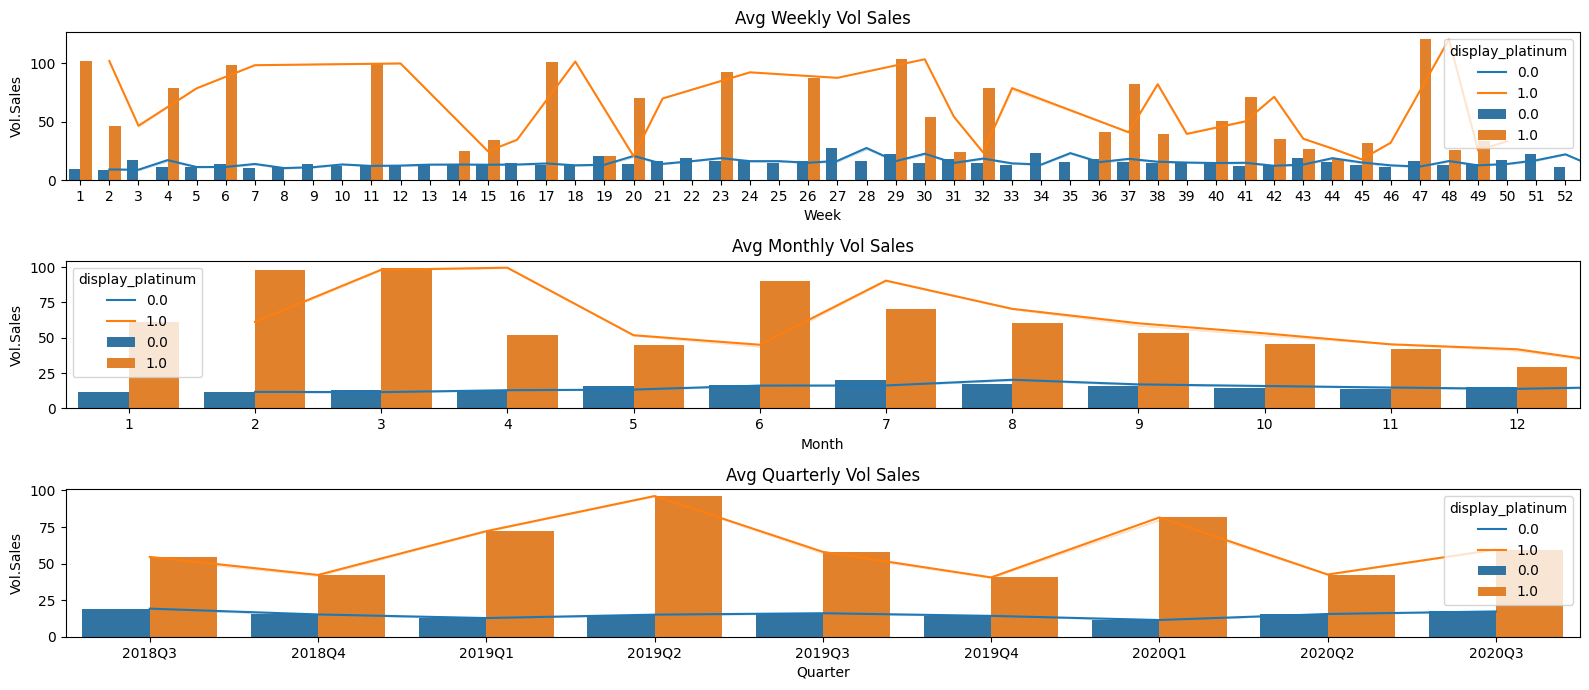

In [295]:
fig, axs = plt.subplots(3, 1, figsize=(16, 7))
sns.lineplot(data=df_EDA,x='Week',y='Vol.Sales',ci=False,hue='display_platinum',ax=axs[0])
sns.barplot(data=df_EDA,x='Week',y='Vol.Sales',ci=False,hue='display_platinum',ax=axs[0])
axs[0].set_title('Avg Weekly Vol Sales')

sns.lineplot(data=df_EDA,x='Month',y='Vol.Sales',ci=False,hue='display_platinum',ax=axs[1])
sns.barplot(data=df_EDA,x='Month',y='Vol.Sales',ci=False,hue='display_platinum',ax=axs[1])
axs[1].set_title('Avg Monthly Vol Sales')

sns.lineplot(data=df_EDA,x='Quarter',y='Vol.Sales',ci=False,hue='display_platinum',ax=axs[2])
sns.barplot(data=df_EDA,x='Quarter',y='Vol.Sales',ci=False,hue='display_platinum',ax=axs[2])
axs[2].set_title('Avg Quarterly Vol Sales')

plt.tight_layout()
plt.savefig('../EDA/Display_platinum & Avg Volume Sales.png')
plt.show()

Observation: The Display Platinum promotion stands out for its substantial impact on volume sales, consistently leading to noticeable spikes in sales whenever implemented.

Actionable Insights: Rather than prioritizing Instore Promotions during the latter half of the year, I suggest shifting focus towards conducting Display Promotions to anticipate a surge in sales.

<h1>Comparing Catalogue and Instore Promotion on Volume Sales<h1\>

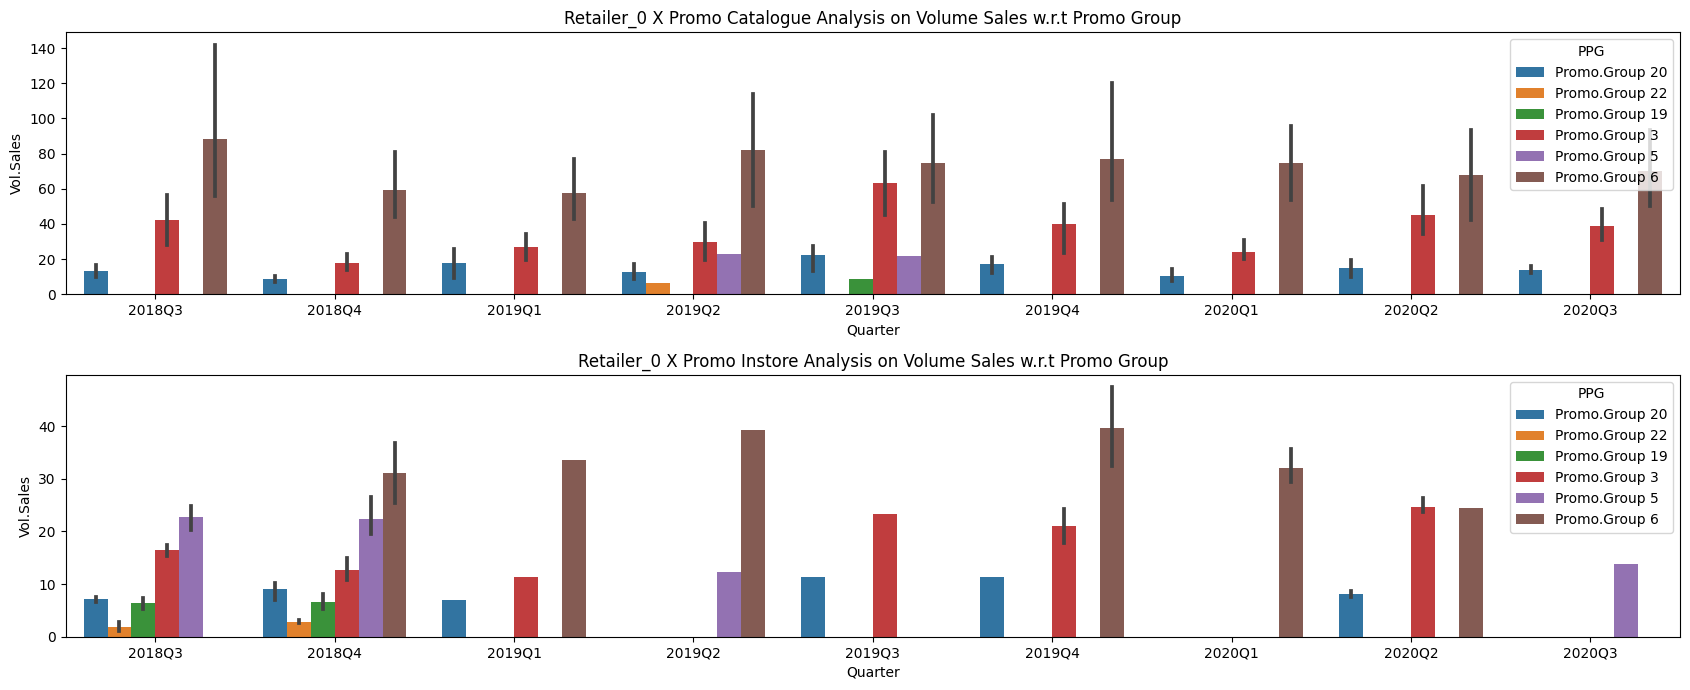

In [296]:
fig, axs = plt.subplots(2, 1, figsize=(17, 7))
sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0') & (df_EDA['promo_catalogue'] == 1)], x='Quarter', y='Vol.Sales',hue='PPG',ax=axs[0],hue_order=['Promo.Group 20', 'Promo.Group 22', 'Promo.Group 19',
       'Promo.Group 3', 'Promo.Group 5', 'Promo.Group 6'])
axs[0].set_title('Retailer_0 X Promo Catalogue Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0') & (df_EDA['promo_ins'] == 1)], x='Quarter', y='Vol.Sales',hue='PPG',ax=axs[1],hue_order=['Promo.Group 20', 'Promo.Group 22', 'Promo.Group 19',
       'Promo.Group 3', 'Promo.Group 5', 'Promo.Group 6'])
axs[1].set_title('Retailer_0 X Promo Instore Analysis on Volume Sales w.r.t Promo Group')

plt.tight_layout()
plt.savefig('../EDA/Retailer_0 Promo_catalogue & Promo_ins Vol sales analysis.png')
plt.show()

Observation: Within Retailer 0, catalogue promotions notably drive sales in Promo Groups 6, 20, and 3, contributing significantly to their collective volume sales. In contrast, Promo Groups 3, 5, 6, and 19 show heightened sales specifically in response to instore promotions.

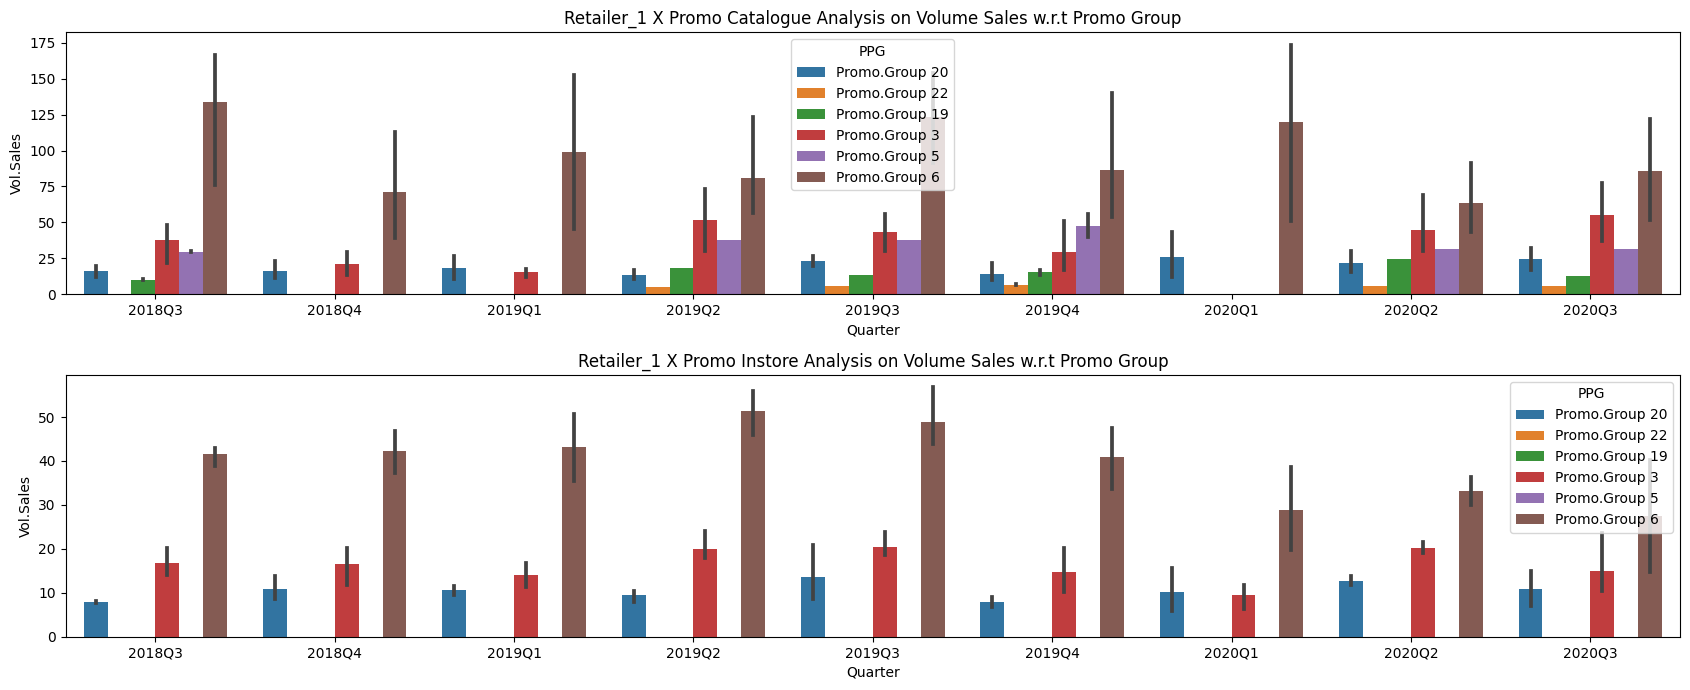

In [297]:
fig, axs = plt.subplots(2, 1, figsize=(17, 7))
sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1') & (df_EDA['promo_catalogue'] == 1)], x='Quarter', y='Vol.Sales',hue='PPG',ax=axs[0],hue_order=['Promo.Group 20', 'Promo.Group 22', 'Promo.Group 19',
       'Promo.Group 3', 'Promo.Group 5', 'Promo.Group 6'])
axs[0].set_title('Retailer_1 X Promo Catalogue Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1') & (df_EDA['promo_ins'] == 1)], x='Quarter', y='Vol.Sales',hue='PPG',ax=axs[1],hue_order=['Promo.Group 20', 'Promo.Group 22', 'Promo.Group 19',
       'Promo.Group 3', 'Promo.Group 5', 'Promo.Group 6'])
axs[1].set_title('Retailer_1 X Promo Instore Analysis on Volume Sales w.r.t Promo Group')

plt.tight_layout()
plt.savefig('../EDA/Retailer_1 Promo_catalogue & Promo_ins Vol sales analysis.png')
plt.show()

Observation: The plotted data indicates that implementing catalogue promotions for retailer 1 appears to generate sales across nearly all promo groups. Conversely, instore promotions seem to have no impact on the sales of promo groups 5, 19, and 22.

<h2>Volume Sales w.r.t Display Promotion<h2\>

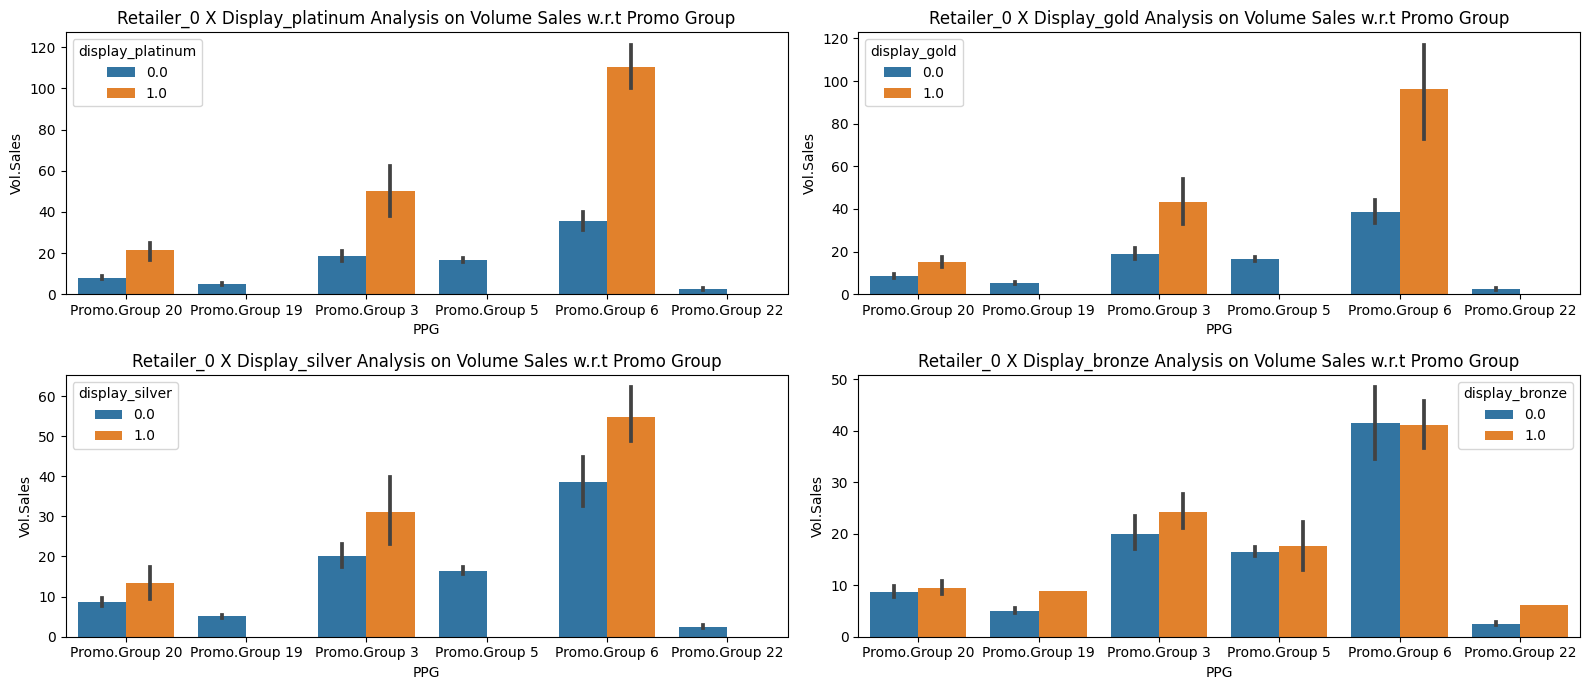

In [298]:
fig, axs = plt.subplots(2, 2, figsize=(16, 7))
sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')], x='PPG', y='Vol.Sales',hue='display_platinum',ax=axs[0,0])
axs[0,0].set_title('Retailer_0 X Display_platinum Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')], x='PPG', y='Vol.Sales',hue='display_gold',ax=axs[0,1])
axs[0,1].set_title('Retailer_0 X Display_gold Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')], x='PPG', y='Vol.Sales',hue='display_silver',ax=axs[1,0])
axs[1,0].set_title('Retailer_0 X Display_silver Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')], x='PPG', y='Vol.Sales',hue='display_bronze',ax=axs[1,1])
axs[1,1].set_title('Retailer_0 X Display_bronze Analysis on Volume Sales w.r.t Promo Group')

plt.tight_layout()
plt.savefig('../EDA/Retailer_0 Display Promotions & Vol sales Analysis.png')
plt.show()

Observation: Among the promotions observed for Retailer 0, Display Platinum, Display Gold, and Display Silver showcase similar volume sales trends, demonstrating substantial impact.Conversely, while Display Bronze manages to cover sales across all promo groups, it achieves comparatively lower volume sales and impact than the other three.

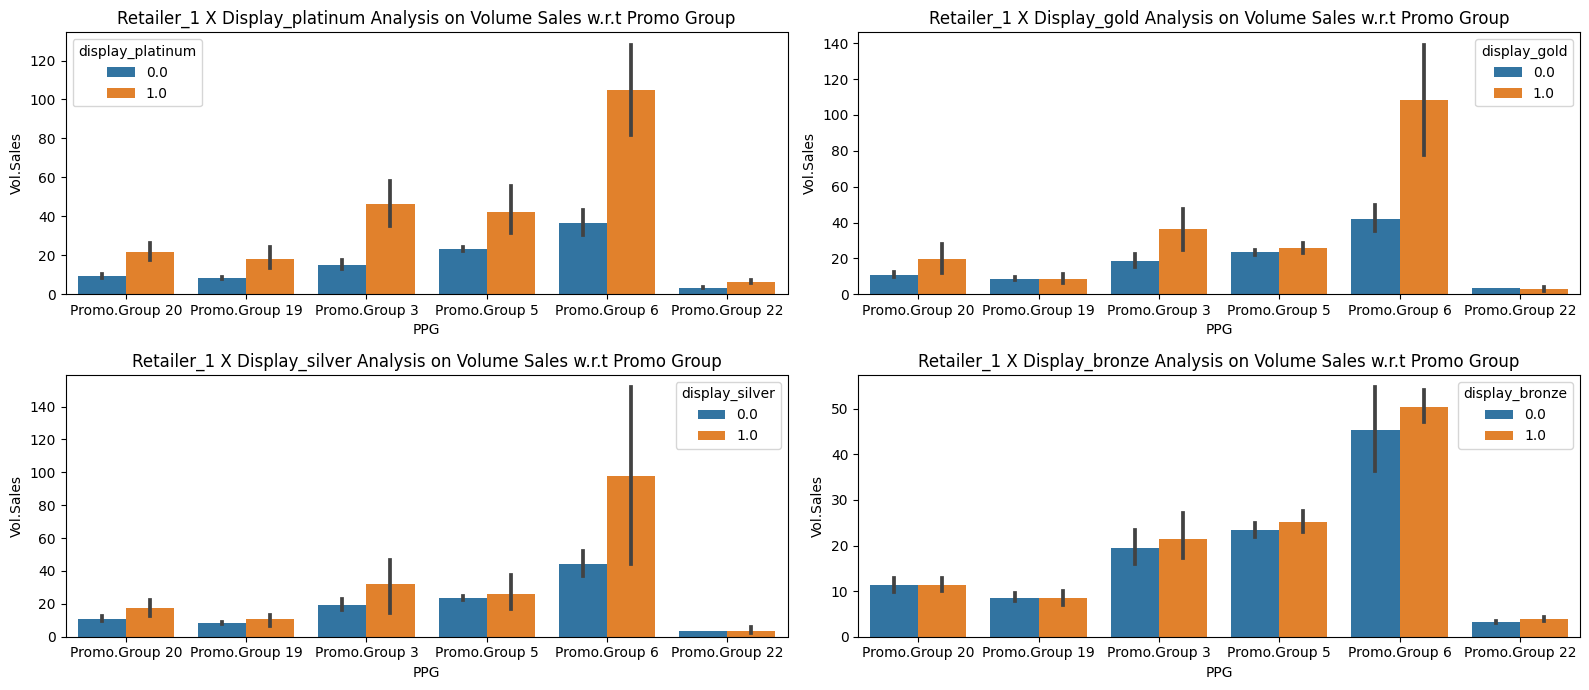

In [299]:
fig, axs = plt.subplots(2, 2, figsize=(16, 7))
sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')], x='PPG', y='Vol.Sales',hue='display_platinum',ax=axs[0,0])
axs[0,0].set_title('Retailer_1 X Display_platinum Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')], x='PPG', y='Vol.Sales',hue='display_gold',ax=axs[0,1])
axs[0,1].set_title('Retailer_1 X Display_gold Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')], x='PPG', y='Vol.Sales',hue='display_silver',ax=axs[1,0])
axs[1,0].set_title('Retailer_1 X Display_silver Analysis on Volume Sales w.r.t Promo Group')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')], x='PPG', y='Vol.Sales',hue='display_bronze',ax=axs[1,1])
axs[1,1].set_title('Retailer_1 X Display_bronze Analysis on Volume Sales w.r.t Promo Group')

plt.tight_layout()
plt.savefig('../EDA/Retailer_1 Display Promotions & Vol sales Analysis.png')
plt.show()

Observation: Across Retailer 1, the majority of promo groups exhibit a positive response to the applied display promotions. Notably, Platinum, Gold, and Silver promotions have a significant impact specifically on Promo Group 6.

<h2>Brand Analysis on Sales<h2\>

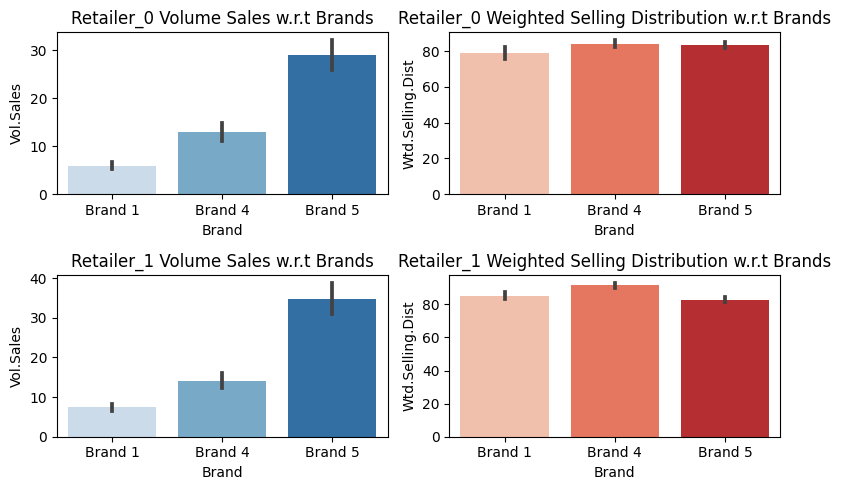

In [300]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')],x='Brand',y='Vol.Sales',ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title('Retailer_0 Volume Sales w.r.t Brands')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')],x='Brand',y='Wtd.Selling.Dist', ax=axs[0, 1], palette='Reds')
axs[0, 1].set_title('Retailer_0 Weighted Selling Distribution w.r.t Brands')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')],x='Brand',y='Vol.Sales', ax=axs[1, 0], palette='Blues')
axs[1, 0].set_title('Retailer_1 Volume Sales w.r.t Brands')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')],x='Brand',y='Wtd.Selling.Dist', ax=axs[1, 1], palette='Reds')
axs[1, 1].set_title('Retailer_1 Weighted Selling Distribution w.r.t Brands')

plt.tight_layout()
plt.savefig('../EDA/Brand wise analysis on Vol sales & Wtd.Selling.Dist.png')
plt.show()

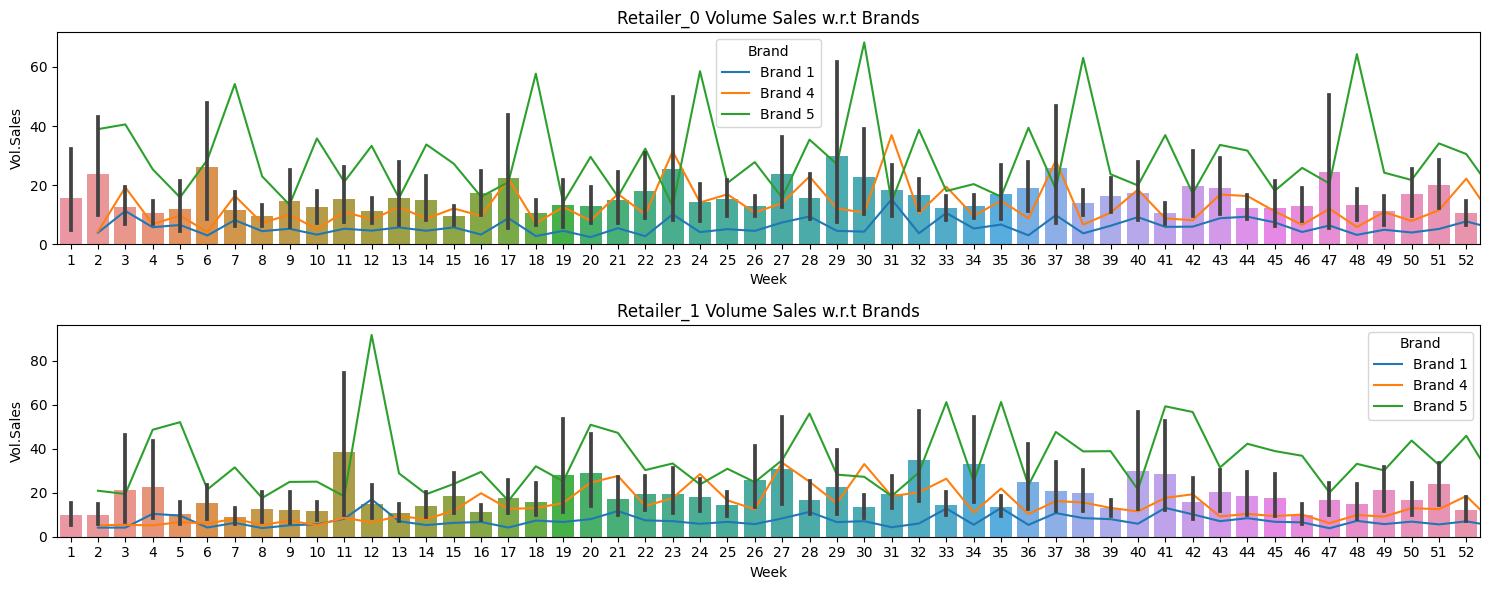

In [301]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6))
sns.lineplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')],x='Week',y='Vol.Sales',hue='Brand',ax=axs[0],ci=None)
axs[0].set_title('Retailer_0 Volume Sales w.r.t Brands')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 0')],x='Week',y='Vol.Sales', ax=axs[0])

sns.lineplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')],x='Week',y='Vol.Sales',hue='Brand',ax=axs[1],ci=None)
axs[1].set_title('Retailer_1 Volume Sales w.r.t Brands')

sns.barplot(data=df_EDA[(df_EDA['Retailer'] == 'Retailer 1')],x='Week',y='Vol.Sales', ax=axs[1])

plt.tight_layout()
plt.savefig('../EDA/Brand wise Weekly Timeseries analysis on Vol sales.png')
plt.show()

Observation: Across both retailers, Brand 5 consistently leads in volume sales over Brand 4, followed by Brand 1. This trend suggests a higher preference for Brand 5 among consumers, resulting in notable variations in volume sales.

<h4>Volume Sales w.r.t Promotion Catalogue and Instore - Retailer 0</h4>

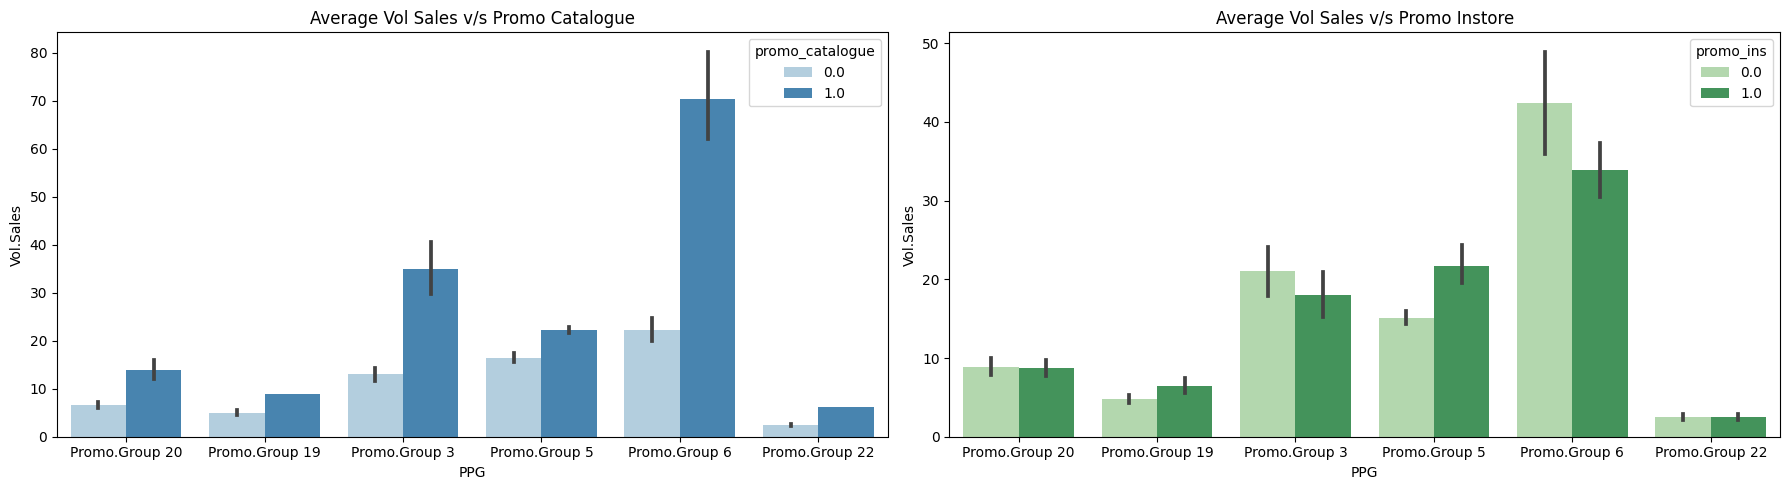

In [302]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(data=df_EDA[df_EDA['Retailer']=='Retailer 0'],x='PPG', y='Vol.Sales',hue='promo_catalogue', ax=axs[0], palette='Blues')
axs[0].set_title('Average Vol Sales v/s Promo Catalogue')

sns.barplot(data=df_EDA[df_EDA['Retailer']=='Retailer 0'],x='PPG', y='Vol.Sales',hue='promo_ins', ax=axs[1], palette='Greens')
axs[1].set_title('Average Vol Sales v/s Promo Instore')

plt.tight_layout()
plt.savefig('../EDA/Retailer_0 Promo_catalogue & Promo_instore Analysis.png')
plt.show()

Observation: The impact of catalogue promotions on volume sales is evidently substantial across all promotion groups, surpassing the influence of Instore promotions. Notably, Promo Groups 20, 3, and 6 for Retailer 0 depict higher sales in the absence of promotions under the Instore category.

<h5>Volume Sales w.r.t Promotion Catalogue and Instore - Retailer 1</h5>

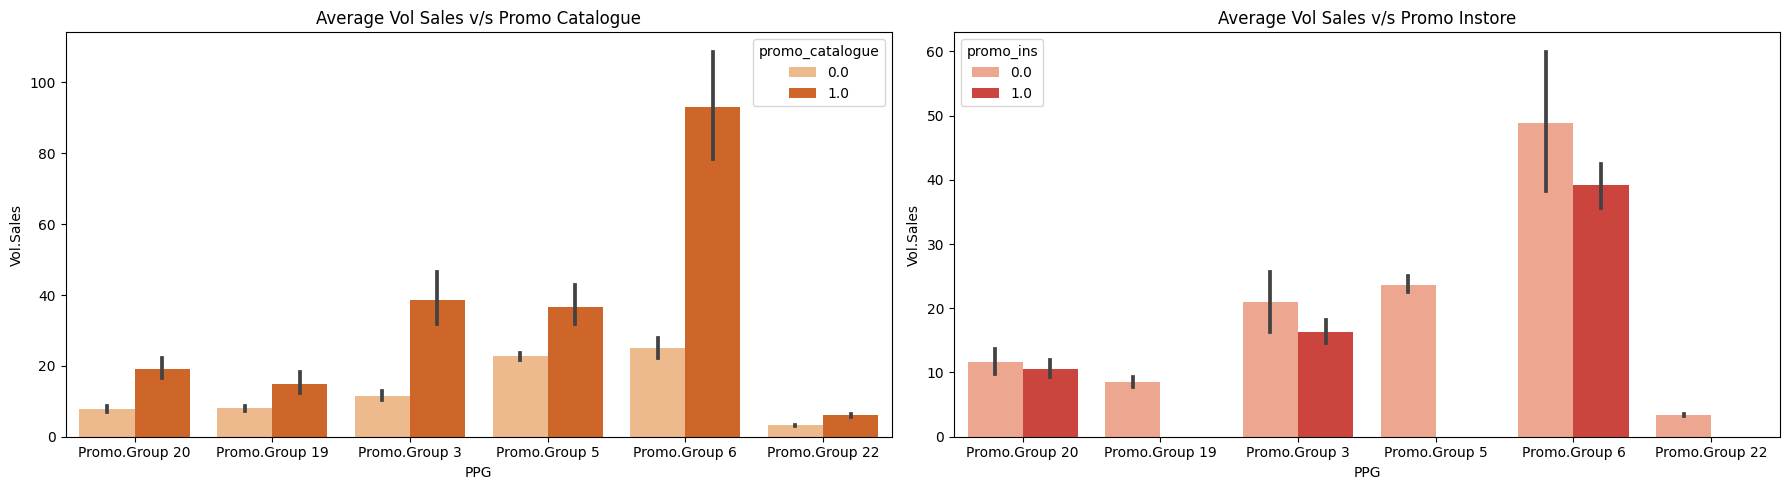

In [303]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(data=df_EDA[df_EDA['Retailer']=='Retailer 1'],x='PPG', y='Vol.Sales',hue='promo_catalogue', ax=axs[0], palette='Oranges')
axs[0].set_title('Average Vol Sales v/s Promo Catalogue')

sns.barplot(data=df_EDA[df_EDA['Retailer']=='Retailer 1'],x='PPG', y='Vol.Sales',hue='promo_ins', ax=axs[1], palette='Reds')
axs[1].set_title('Average Vol Sales v/s Promo Instore')

plt.tight_layout()
plt.savefig('../EDA/Retailer_1 Promo_catalogue & Promo_instore Analysis.png')
plt.show()

Observation: Similar to Retailer 0, Instore Promotion does not hold impact on volume sales since without instore promotion itself sales are good, whereas catalogue hold positive impact on sales.


<h5>Sales w.r.t various Brands Analysis</h5>

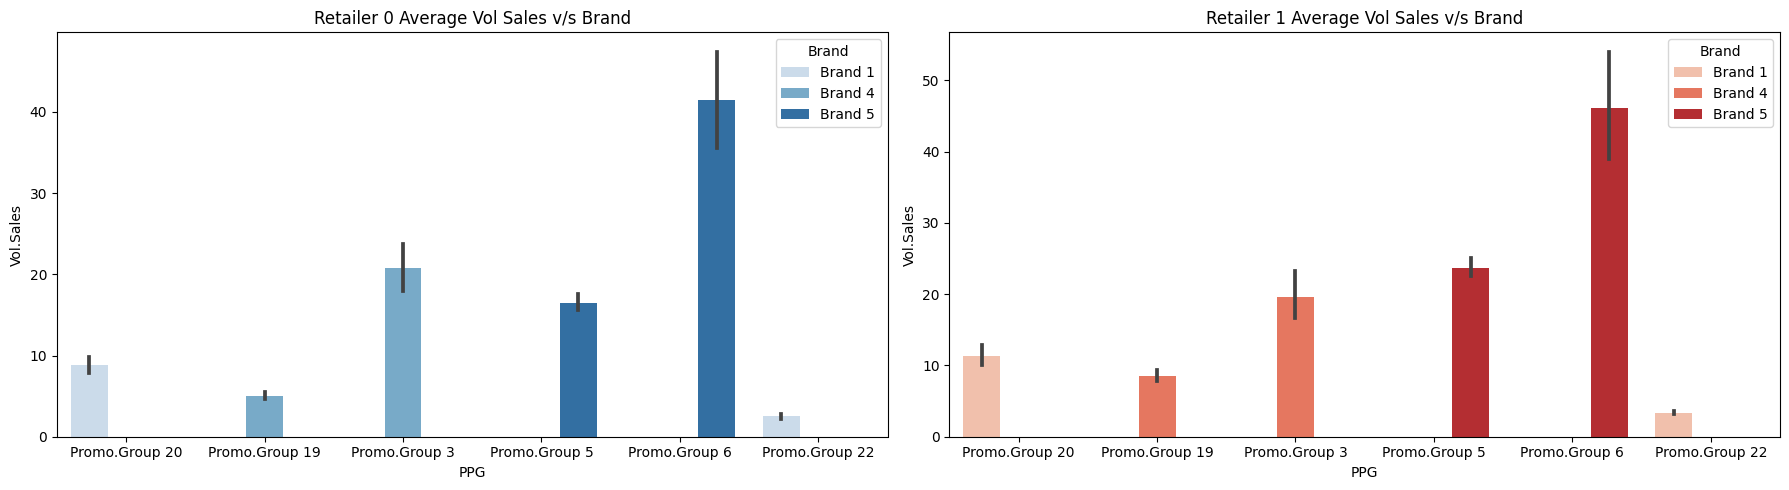

In [304]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(data=df_EDA[df_EDA['Retailer']=='Retailer 0'],x='PPG', y='Vol.Sales',hue='Brand', ax=axs[0], palette='Blues')
axs[0].set_title('Retailer 0 Average Vol Sales v/s Brand')

sns.barplot(data=df_EDA[df_EDA['Retailer']=='Retailer 1'],x='PPG', y='Vol.Sales',hue='Brand', ax=axs[1], palette='Reds')
axs[1].set_title('Retailer 1 Average Vol Sales v/s Brand')

plt.tight_layout()
plt.show()

Within Retailer 0's graph, it's apparent that Brand 5 accounts for the highest volume sales, primarily driven by Promo Groups 6 and 5. Following Brand 5, Brand 4 contributes significantly, and lastly, Brand 1 shows lower sales. This analysis holds a similar pattern when examining Retailer 1.

<h4>Weighted Price vs Vol.Sales<h4\>

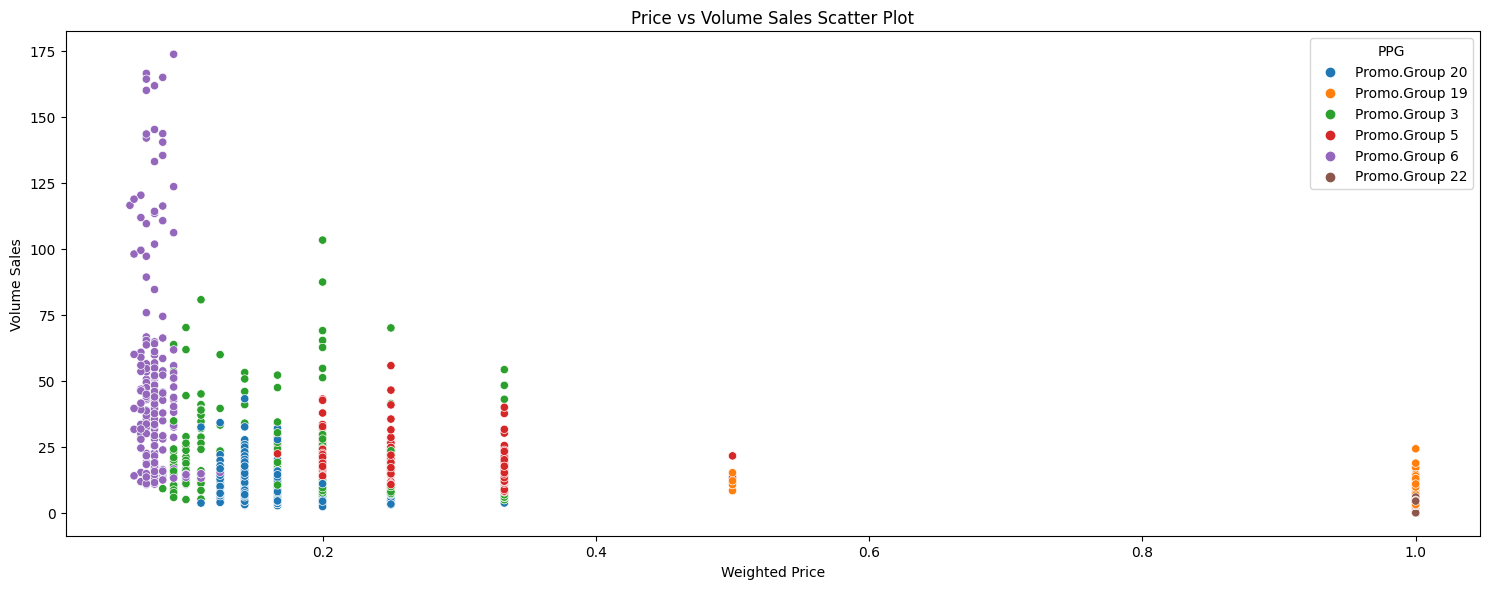

In [305]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=round(df_EDA['Weighted_Price'],3), y=df_EDA['Vol.Sales'],hue=df_EDA['PPG'])
plt.xlabel('Weighted Price')
plt.ylabel('Volume Sales')
plt.title('Price vs Volume Sales Scatter Plot')
plt.savefig('../EDA/Price vs Volume Sales Scatter Plot.png')
plt.show()

Observation: The plot illustrates that Promo Group 6, characterized by a lower weighted price, experiences higher volume sales, closely trailed by Promo Group 3. Conversely, Promo Group 19, associated with a higher weighted price, demonstrates lower volume sales as a consequence.

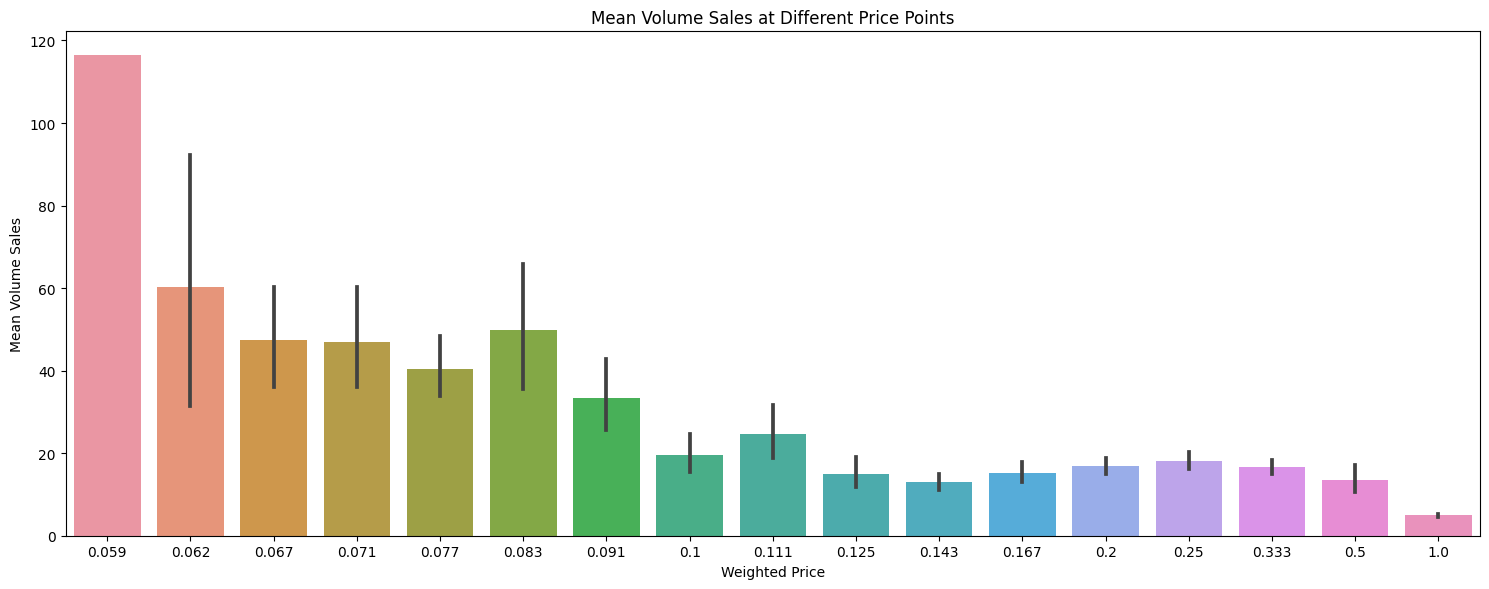

In [306]:
plt.figure(figsize=(15,6))
sns.barplot(x=round(df_EDA['Weighted_Price'],3), y=df_EDA['Vol.Sales'])
plt.xlabel('Weighted Price')
plt.ylabel('Mean Volume Sales')
plt.title('Mean Volume Sales at Different Price Points')
plt.savefig('../EDA/Mean Volume Sales at Different Price Points.png')
plt.show()

<h3>Retailer Wise Analysis<h3\>

<h5>Retailer 0<h5\>

In [307]:
df=df_EDA[df_EDA['Retailer'] == 'Retailer 0'].copy()
df['total_promos']=(df['promo_catalogue'] + df['promo_ins'] +
            df['display_platinum'] + df['display_gold'] +
            df['display_silver'] + df['display_bronze'])
df.rename(columns={'PPG':'Promo.Group'},inplace=True)

<h5>Average Sales by Promo Group</h5>

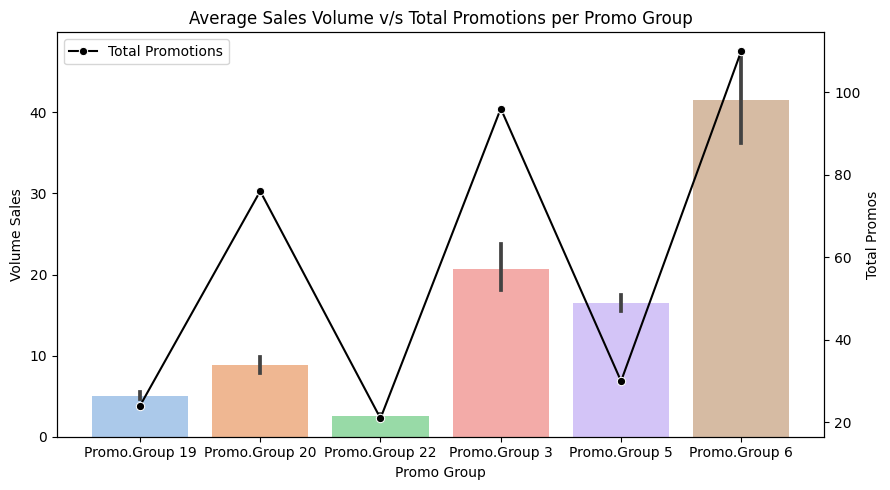

In [308]:
sum_by_category = df.groupby('Promo.Group')['total_promos'].sum().reset_index()
palette = sns.color_palette("pastel")

plt.figure(figsize=(9, 5))

ax = sns.barplot(data=df, x='Promo.Group', y='Vol.Sales', palette=palette, label='Average Sales Volume',order=['Promo.Group 19', 'Promo.Group 20', 'Promo.Group 22',
       'Promo.Group 3', 'Promo.Group 5', 'Promo.Group 6'])
ax.set_title('Average Sales Volume v/s Total Promotions per Promo Group')
ax.set_xlabel('Promo Group')
ax.set_ylabel('Volume Sales')
ax.grid(False)

ax2 = ax.twinx()
sns.lineplot(data=sum_by_category, x='Promo.Group', y='total_promos', color='black', marker='o',ax=ax2, label='Total Promotions')

ax2.set_ylabel('Total Promos')


plt.savefig('../EDA/Retailer_0 Average Sales Volume & Total Promotions per Promo Group.png')
plt.show()

Observation: For retailer 0, the average sales of Promo Group 6 is the highest, however the total promotions applied on Promo 6 is also the highest. Comparing the total promotions with the Promo Group 3, the total promotions applied is somewhat less than Promo Group 6 but the difference of average Volume Sales is much higher. Average volume sales of Promo Group 5 is a little lower than Promo Group 3, however the total number of promotions applied is much much lower.An observation we can make here is that, Promo Group 3 requires a lot of Promotions to accelerate sales compared to groups like Promo Group 5. A similiar observation can be made for Promo Group 19 and 20.

<h4>Quarterly Average Sales</h4>

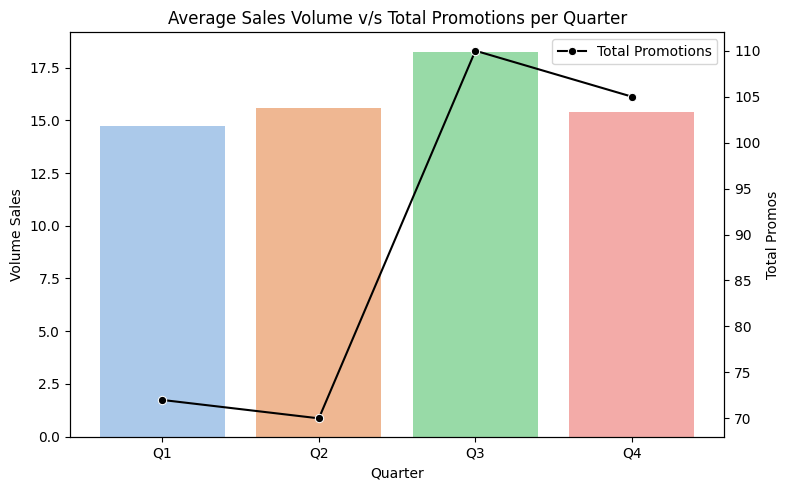

In [309]:
def get_quarter_string(date):
    quarter = (date.month - 1) // 3 + 1
    return f'Q{quarter}'

df['Date']=pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].apply(get_quarter_string)
sum_by_category = df.groupby('Quarter')['total_promos'].sum().reset_index()
average_volume = df.groupby('Quarter')['Vol.Sales'].mean().reset_index()
merged_data = pd.merge(average_volume, sum_by_category, on='Quarter')

palette = sns.color_palette("pastel")

plt.figure(figsize=(8, 5))

ax = sns.barplot(data=merged_data, x='Quarter', y='Vol.Sales', palette=palette, label='Average Sales Volume')
ax.set_title('Average Sales Volume v/s Total Promotions per Quarter')
ax.set_xlabel('Quarter')
ax.set_ylabel('Volume Sales')
ax.grid(False)

ax2 = ax.twinx()
sns.lineplot(data=merged_data, x='Quarter', y='total_promos', color='black', marker='o', ax=ax2, label='Total Promotions')

ax2.set_ylabel('Total Promos')
plt.savefig('../EDA/Retailer_0 Average Sales Volume & Total Promotions per Quarter.png')
plt.show()

Observation: The average sales in quarter 3 is the highest, however at the same time the total promotions applied in quarter 3 is also the highest. The average sales in quarter 2 is similiar to average sales in quarter 4. Quarter 3 and Quarter 4 are Promotion Heavy Quarters.

Observation: The trends in the Value of the sales is following the same trajectory of the Volume of Sales.

<h5>Timeseries sales plot for Promo Groups</h5>

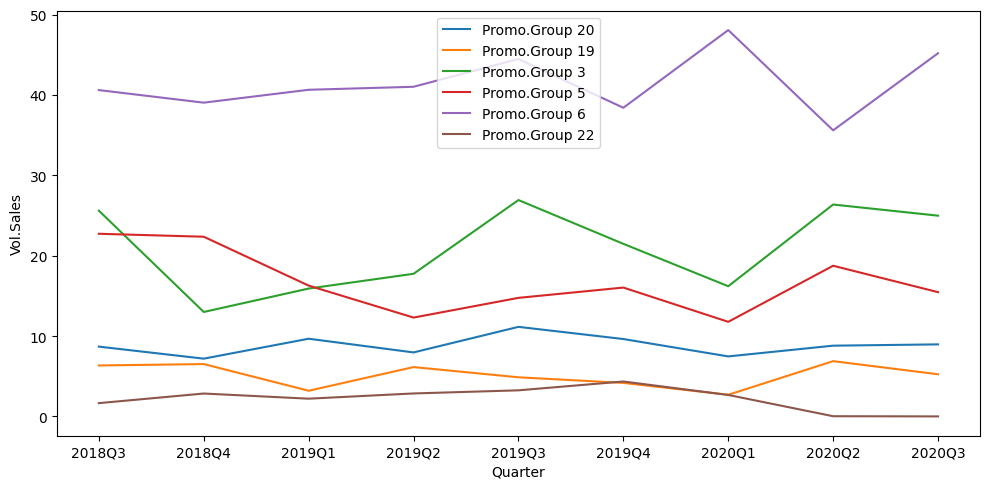

In [310]:
df['Date']=pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Quarter'] = df['Quarter'].astype(str)
plt.figure(figsize=(10, 5))

for pr_gp in df['Promo.Group'].unique():
    ts_data=df[df['Promo.Group']==pr_gp]
    sns.lineplot(data=ts_data, x='Quarter', y='Vol.Sales',ci=None,label=pr_gp)

plt.savefig('../EDA/Retailer_0 Timeseries sales plot for Promo Groups.png')
plt.show()


Observation: As expected, Promo Group 6 has the highest sales in all quarters. Promo Group 22 has diminishing sales. From the looks of it, the products in Promo Group 6 seem to be discontinued at this retailer.

<h5>Volume Sales w.r.t Display Promotion</h5>

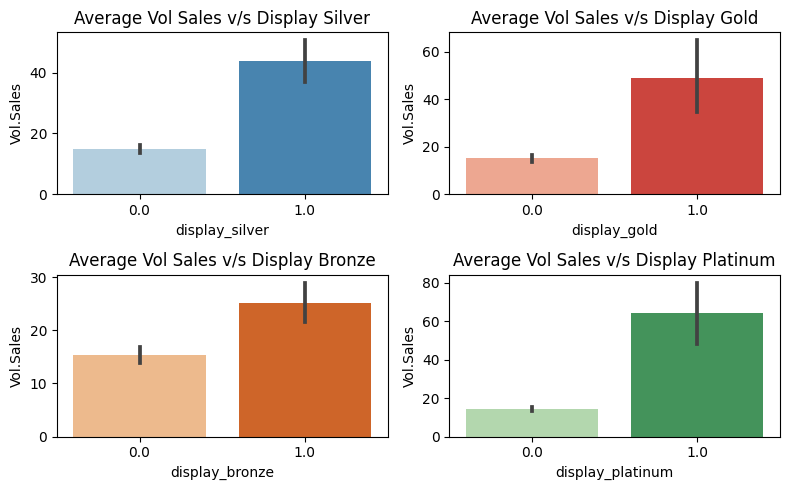

In [311]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.barplot(data=df,x='display_silver', y='Vol.Sales', ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title('Average Vol Sales v/s Display Silver')

sns.barplot(data=df,x='display_gold', y='Vol.Sales', ax=axs[0, 1], palette='Reds')
axs[0, 1].set_title('Average Vol Sales v/s Display Gold')

sns.barplot(data=df,x='display_bronze', y='Vol.Sales', ax=axs[1, 0], palette='Oranges')
axs[1, 0].set_title('Average Vol Sales v/s Display Bronze')

sns.barplot(data=df,x='display_platinum', y='Vol.Sales', ax=axs[1, 1], palette='Greens')
axs[1, 1].set_title('Average Vol Sales v/s Display Platinum')

plt.tight_layout()
plt.show()

Observation: The bar plot clearly indicates that the "Display_Platinum" promotion strategy leads to the highest average sales volume compared to other promotional strategies. Additionally, a significant difference in average volume sales is evident when comparing scenarios with and without the platinum display promotion.

<h5>Sales w.r.t various Brands Analysis</h5>

Observation: Brand 5 leads the pack, followed by Brand 4 and Brand 1. The sales graphs for Vol. Sales, Unit Sales, and Val. Sales look similar across these brands, indicating consistency with our business logic.

Observation: As expected, Brand 5 maintains the highest vol sales across all quarters. In contrast, Brand 1 demonstrates consistently lower volume sales that gradually decline over time. Notably, Brand 4 exhibits a seasonal pattern, consistently achieving higher sales volumes in Q3 of each year.

<h5>Retailer 1</h5>

In [312]:
df=df_EDA[df_EDA['Retailer'] == 'Retailer 1'].copy()
df.rename(columns={'PPG':'Promo.Group'},inplace=True)
df['total_promos']=(df['promo_catalogue'] + df['promo_ins'] +
            df['display_platinum'] + df['display_gold'] +
            df['display_silver'] + df['display_bronze'])

<h5>Average Sales by Promo Group</h5>

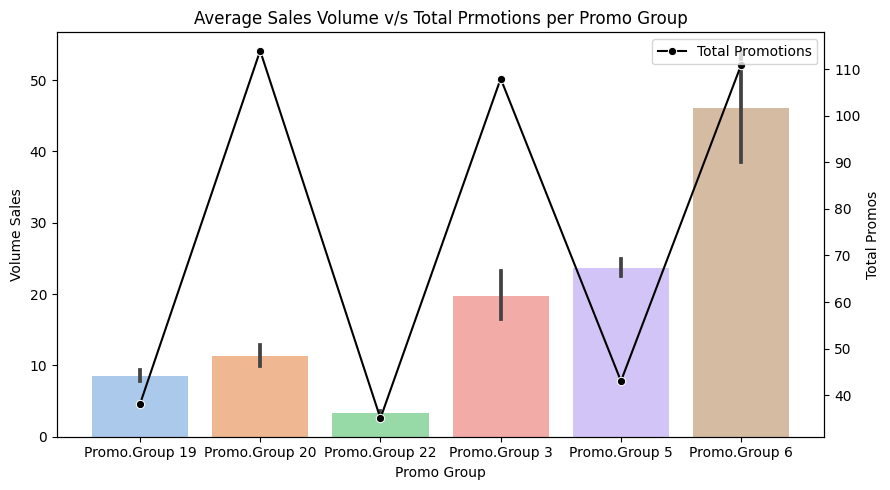

In [313]:
sum_by_category = df.groupby('Promo.Group')['total_promos'].sum().reset_index()
palette = sns.color_palette("pastel")

plt.figure(figsize=(9, 5))

ax = sns.barplot(data=df, x='Promo.Group', y='Vol.Sales', palette=palette, label='Average Sales Volume',order=['Promo.Group 19', 'Promo.Group 20', 'Promo.Group 22',
       'Promo.Group 3', 'Promo.Group 5', 'Promo.Group 6'])
ax.set_title('Average Sales Volume v/s Total Prmotions per Promo Group')
ax.set_xlabel('Promo Group')
ax.set_ylabel('Volume Sales')
ax.grid(False)

ax2 = ax.twinx()
sns.lineplot(data=sum_by_category, x='Promo.Group', y='total_promos', color='black', marker='o', ax=ax2, label='Total Promotions')

ax2.set_ylabel('Total Promos')

plt.savefig('../EDA/Retailer_1 Average Sales Volume & Total Promotions per Promo Group.png')
plt.show()

Observation: Similiar to Retailer 0, the average sales in Promo Group 6 is the highest. However, the highest number of Promotions were applied on Promo Group 20 but the average Volume Sales are much much lower than Promo Group 6. In a similiar scenario, the total promotions applied on Promo Group 3 is very high but as compared to Promo Group 5, the average volume sales is low despite Prmo Group 5 getting much lower promotions. Applying Promotions on Promo Group 5 could lead to exponential increase in sales. 

<h4>Quarterly Average Sales</h4>

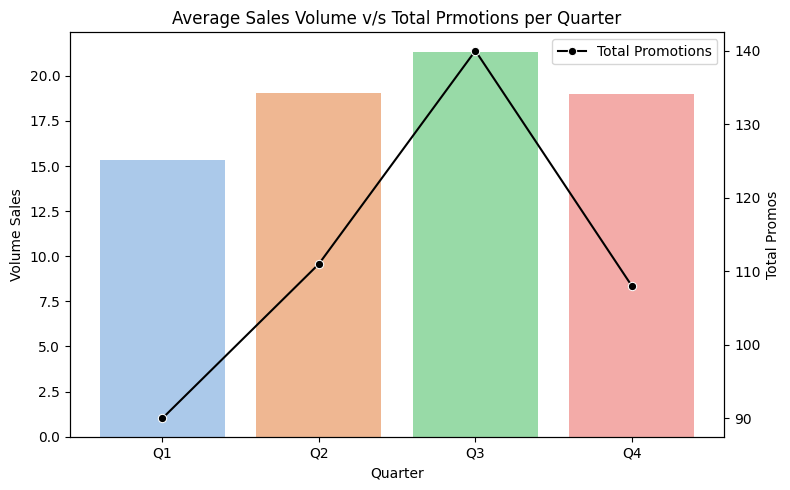

In [314]:
def get_quarter_string(date):
    quarter = (date.month - 1) // 3 + 1
    return f'Q{quarter}'

df['Date']=pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].apply(get_quarter_string)
sum_by_category = df.groupby('Quarter')['total_promos'].sum().reset_index()
average_volume = df.groupby('Quarter')['Vol.Sales'].mean().reset_index()
merged_data = pd.merge(average_volume, sum_by_category, on='Quarter')

palette = sns.color_palette("pastel")

plt.figure(figsize=(8, 5))

ax = sns.barplot(data=merged_data, x='Quarter', y='Vol.Sales', palette=palette, label='Average Sales Volume')
ax.set_title('Average Sales Volume v/s Total Prmotions per Quarter')
ax.set_xlabel('Quarter')
ax.set_ylabel('Volume Sales')
ax.grid(False)

ax2 = ax.twinx()
sns.lineplot(data=merged_data, x='Quarter', y='total_promos', color='black', marker='o', ax=ax2, label='Total Promotions')

ax2.set_ylabel('Total Promos')
plt.savefig('../EDA/Retailer_1 Average Sales Volume & Total Prmotions per Quarter.png')
plt.show()

Observation: Quarter 3 has seen the highest average sales. The large number of promotions are also applied during the 3rd Quarter. Quarter 2 and Quarter 4 have similiar average sales and promotions. Slightly increasing promotions can lead to a manifold increase in sales in these two quarters.

<h5>Timeseries sales plot for Promo Groups</h5>

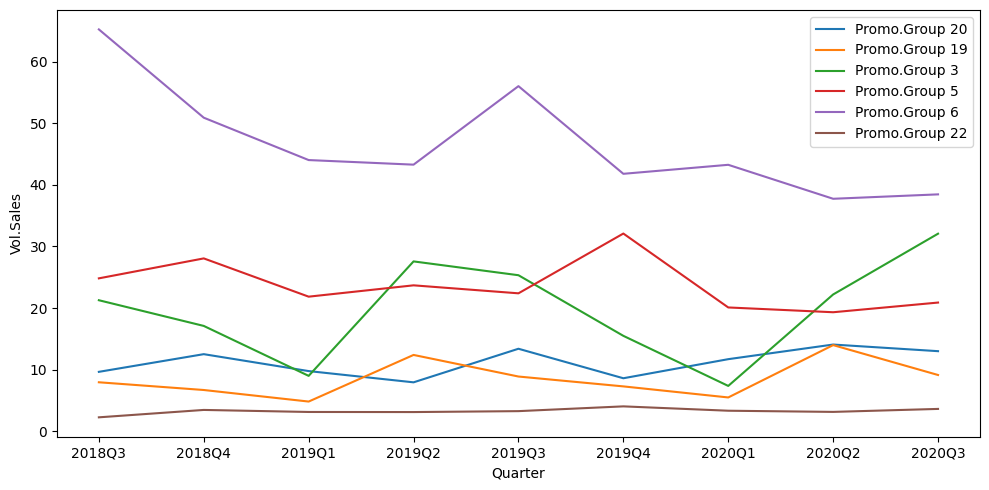

In [315]:
df['Date']=pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Quarter'] = df['Quarter'].astype(str)
plt.figure(figsize=(10, 5))

for pr_gp in df['Promo.Group'].unique():
    ts_data=df[df['Promo.Group']==pr_gp]
    sns.lineplot(data=ts_data, x='Quarter', y='Vol.Sales',ci=None,label=pr_gp)

plt.savefig('../EDA/Retailer_1 Timeseries sales plot for Promo Groups.png')
plt.show()


Observation: Compared to Retailer 0, the Promo Group 22 has stagnant sales and have not come down to 0. Also as expected, the promo group 6 has the higest trends in Sales, however the sales are diminishing since the past year.

<h5>Volume Sales w.r.t Display_promo</h5>

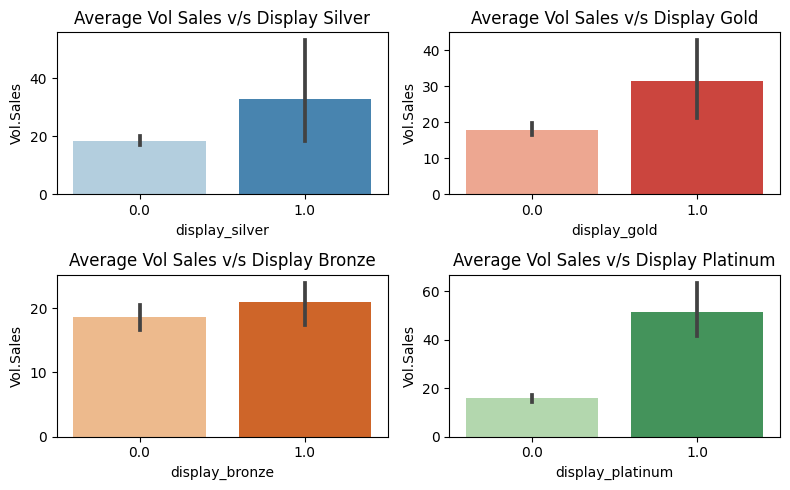

In [316]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.barplot(data=df,x='display_silver', y='Vol.Sales', ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title('Average Vol Sales v/s Display Silver')

sns.barplot(data=df,x='display_gold', y='Vol.Sales', ax=axs[0, 1], palette='Reds')
axs[0, 1].set_title('Average Vol Sales v/s Display Gold')

sns.barplot(data=df,x='display_bronze', y='Vol.Sales', ax=axs[1, 0], palette='Oranges')
axs[1, 0].set_title('Average Vol Sales v/s Display Bronze')

sns.barplot(data=df,x='display_platinum', y='Vol.Sales', ax=axs[1, 1], palette='Greens')
axs[1, 1].set_title('Average Vol Sales v/s Display Platinum')

plt.tight_layout()
plt.show()

Observation: Similar to Retailer 0,the bar plot clearly indicates that the "Display_Platinum" promotion strategy leads to the highest average sales volume compared to other promotional strategies. Additionally, a significant difference in average volume sales is evident when comparing scenarios with and without the platinum display promotion.

<h3>Hypothesis:<h3\><br>                                                                                                                        

-> The promotion campaigns have significant impact on the Vol sales for each PPG.<br>
-> Implementing better promotion strategies must result in better Sales. eg Platinum Display must accelerate more sale than Bronze display or other displays. 